In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from tqdm.auto import tqdm
from matplotlib.lines import Line2D
from sklearn.cluster import DBSCAN

In [2]:
train_data = pd.read_csv('dataset/train_data.csv')
test_data = pd.read_csv('dataset/test_data.csv')
submission = pd.read_csv('dataset/answer_sample.csv')

In [3]:
train_data['data_type'] = 'train'
test_data['data_type'] = 'test'

In [4]:
def box_plot(data, title=""):
    plt.figure(figsize=(3,5))
    g = sns.boxplot(data=pd.DataFrame(data), showfliers=False)
    g.set_title(title, size=10)
    g.set_xticklabels(g.get_xticklabels())
    plt.show()

In [5]:
# train_data 분리

for i in range(8):
  globals()['train_data{}'.format(i)] = train_data[train_data['type'] == i]

# test_data 분리
for i in range(8):
  globals()['test_data{}'.format(i)] = test_data[test_data['type'] == i]

In [6]:
def plot_corr(data, name1, name2):
    plt.figure(figsize=(7,5))
    correlation = data[name1].corr(data[name2])
    j = 0
    color = ['green', 'yellow', 'red']
    for i in range(8):
        globals()['data{}'.format(i)] = data[data['type'] == i]
        if i == 1 or i == 2 or i == 3:
            sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
            j += 1
        else :
            sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color='blue')
    plt.title('correlation: ' + str(np.round(correlation, 2)), fontsize=20)
    plt.xlabel(name1, fontsize=12)
    plt.ylabel(name2, fontsize=12)
    plt.legend(labels=['type = 0, 4, 5, 6, 7','type = 1', 'type = 2','type = 3'])
    plt.show()

In [7]:
train_data['motor_rpm/motor_current'] = train_data['motor_rpm'] / train_data['motor_current']
train_data['air_inflow/motor_current'] = train_data['air_inflow'] / train_data['motor_current'] 

In [8]:
test_data['motor_rpm/motor_current'] = test_data['motor_rpm'] / test_data['motor_current']
test_data['air_inflow/motor_current'] = test_data['air_inflow'] / test_data['motor_current'] 

In [9]:
# 상관도 표 함수
def corr_matrix(data):
  plt.figure(figsize=(7,5))
  mask = np.zeros_like(data.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  g = sns.heatmap(data.corr(), cmap='RdYlGn_r', vmax=1, mask=mask, center=0, annot=True, annot_kws={"size": 10}, fmt=".2f", square=True,
                  cbar_kws={"shrink":.7})
  g.set_xticklabels(g.get_xmajorticklabels(), fontsize=10)
  g.set_yticklabels(g.get_xmajorticklabels(), fontsize=10)
  plt.show()

In [10]:
# 상관도 표 함수
def subplot_corr_matrix(data):
  f, axs = plt.subplots(4,2,figsize=(10,12))
  for i in range(8):
    globals()['data{}'.format(i)] = data[data['type']==i].drop(columns=['out_pressure', 'type'])
    mask = np.zeros_like(globals()['data{}'.format(i)].corr(), dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    g = sns.heatmap(globals()['data{}'.format(i)].corr(), cmap='RdYlGn_r', vmax=1,vmin=0,  mask=mask, center=0, annot=True, annot_kws={"size":10},
                    fmt=".2f", square=True, ax=axs[int(i/2), i%2], cbar_kws={"shrink":.7})
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize=4)
    g.set_yticklabels(g.get_xmajorticklabels(), fontsize=4)
    axs[int(i/2), i%2].set_title('type={}'.format(i),size=4)
  plt.tight_layout()
  plt.show()

In [11]:
def sub_plot_corr(data,data2,  name1, name2):
  plt.figure(figsize=(10,5))
  correlation = data[name1].corr(data[name2])
  j = 0
  color = ['green', 'yellow', 'red']
  for i in range(8):
    globals()['data{}'.format(i)] = data[data['type'] == i]
    plt.subplot(1,2,1)
    if i == 1 or i == 2 or i == 3:
      g = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
      j += 1
    else :
      g = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color='blue')
  g.set_title("train_data", size=10)
  g.set_xticklabels(g.get_xticklabels())
  g.set_yticklabels(g.get_yticklabels())
  plt.legend(labels=['type = 0, 4, 5, 6, 7','type = 1', 'type = 2','type = 3'])
  j = 0
  for i in range(8):
    globals()['data{}'.format(i)] = data2[data2['type'] == i]
    plt.subplot(1,2,2)
    if i == 1 or i == 2 or i == 3:
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
      j += 1
    else :
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color='blue') 
  g2.set_title("test_data", size=10)
  g2.set_xticklabels(g.get_xticklabels())
  g2.set_yticklabels(g.get_yticklabels())
  g2.set_ylim(g.get_ylim())
  plt.legend(labels=['type = 0, 4, 5, 6, 7','type = 1', 'type = 2','type = 3'])
  plt.tight_layout()
  plt.show()

In [12]:
train_data = train_data[train_data['motor_vibe']<=20].reset_index(drop=True)

In [13]:
def custom_split_data(data, name1, name2):
  data[name1+'/'+name2] = np.NaN
  for i in tqdm(range(len(data))):
    if data['type'][i] == 1:
      data[name1+'/'+name2][i] = data[name1][i] / data[name2][i]
    elif data['type'][i] == 2:
      data[name1+'/'+name2][i] = data[name1][i] / data[name2][i]
    elif data['type'][i] == 3:
      data[name1+'/'+name2][i] = data[name1][i] / data[name2][i]
    else:
      data[name1+'/'+name2][i] = data[name1][i] / data[name2][i]
  return data

In [14]:
def custom_split_data_horse(data, name1):
  data[name1+'/horse_power'] = np.NaN
  for i in tqdm(range(len(data))):
    if data['type'][i] == 1:
      data[name1+'/horse_power'][i] = data[name1][i] / 20
    elif data['type'][i] == 2:
      data[name1+'/horse_power'][i] = data[name1][i] / 10
    elif data['type'][i] == 3:
      data[name1+'/horse_power'][i] = data[name1][i] / 50
    else:
      data[name1+'/horse_power'][i] = data[name1][i] / 30
  return data

In [15]:
train_data = custom_split_data(train_data, 'air_inflow', 'motor_rpm')
test_data = custom_split_data(test_data, 'air_inflow', 'motor_rpm')

  0%|          | 0/2447 [00:00<?, ?it/s]

  0%|          | 0/7389 [00:00<?, ?it/s]

In [16]:
train_data = custom_split_data(train_data, 'motor_current', 'motor_rpm')
test_data = custom_split_data(test_data, 'motor_current', 'motor_rpm')
train_data = custom_split_data_horse(train_data, 'motor_current')
test_data = custom_split_data_horse(test_data, 'motor_current')

  0%|          | 0/2447 [00:00<?, ?it/s]

  0%|          | 0/7389 [00:00<?, ?it/s]

  0%|          | 0/2447 [00:00<?, ?it/s]

  0%|          | 0/7389 [00:00<?, ?it/s]

In [17]:
train_data = custom_split_data(train_data, 'motor_vibe', 'motor_temp')
test_data = custom_split_data(test_data, 'motor_vibe', 'motor_temp')

  0%|          | 0/2447 [00:00<?, ?it/s]

  0%|          | 0/7389 [00:00<?, ?it/s]

In [18]:
train_data = custom_split_data(train_data, 'motor_temp', 'air_end_temp')
test_data = custom_split_data(test_data, 'motor_temp', 'air_end_temp')

  0%|          | 0/2447 [00:00<?, ?it/s]

  0%|          | 0/7389 [00:00<?, ?it/s]

In [19]:
def sub_plot_corr_plus(data,data2,  name1, name2):
  plt.figure(figsize=(10,5))
  correlation = data[name1].corr(data[name2])
  j = 0
  color = ['green', 'yellow', 'red']
  for i in range(8):
    globals()['data{}'.format(i)] = data[data['type'] == i]
    plt.subplot(1,2,1)
    if i == 1 or i == 2 or i == 3:
      g = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
      j += 1
    else :
      g = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color='blue')
  g.set_title("train_data", size=10)
  g.set_xticklabels(g.get_xticklabels())
  g.set_yticklabels(g.get_yticklabels())
  plt.legend(labels=['type = 0, 4, 5, 6, 7','type = 1', 'type = 2','type = 3'])
  j = 0
  for i in range(8):
    globals()['data{}'.format(i)] = data2[data2['type'] == i]
    plt.subplot(1,2,2)
    if i == 1 or i == 2 or i == 3:
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
      j += 1
    else :
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color='blue') 
  data_ = data4[data4['out_pressure']!=0.7] 
  g2 = sns.scatterplot(data=data_, x=name1, y=name2, color='black') 
  g2.set_title("test_data", size=10)
  g2.set_xticklabels(g.get_xticklabels())
  g2.set_yticklabels(g.get_yticklabels())
  g2.set_ylim(g.get_ylim())
  plt.legend(labels=['type = 0, 4, 5, 6, 7','type = 1', 'type = 2','type = 3'])
  plt.tight_layout()
  plt.show()

In [20]:
def sub_plot_corr_plus2(data,data2,  name1, name2):
  plt.figure(figsize=(10,5))
  correlation = data[name1].corr(data[name2])
  k = 0
  j = 0
  color = ['green', 'yellow', 'red']
  color2 = ['#03ffee','#003ea1','#0b9630','#7e02ab','#a1790d']
  for i in range(8):
    globals()['data{}'.format(i)] = data[data['type'] == i]
    plt.subplot(1,2,1)
    if i == 1 or i == 2 or i == 3:
      g = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
      j += 1
    else :
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color2[k]) 
      k += 1
  g.set_title("train_data", size=10)
  g.set_xticklabels(g.get_xticklabels())
  g.set_yticklabels(g.get_yticklabels())
  plt.legend(labels=['type = 0','type = 1', 'type = 2','type = 3', 'type = 4', 'type = 5', 'type = 6', 'type = 7'])
  j = 0
  k = 0
  for i in range(8):
    globals()['data{}'.format(i)] = data2[data2['type'] == i]
    plt.subplot(1,2,2)
    if i == 1 or i == 2 or i == 3:
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
      j += 1
    else :
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color2[k]) 
      k += 1
  g2.set_title("test_data", size=10)
  g2.set_xticklabels(g.get_xticklabels())
  g2.set_yticklabels(g.get_yticklabels())
  g2.set_ylim(g.get_ylim())
  plt.legend(labels=['type = 0','type = 1', 'type = 2','type = 3', 'type = 4', 'type = 5', 'type = 6', 'type = 7'])
  plt.tight_layout()
  plt.show()

In [21]:
sum_data = pd.concat([train_data, test_data]).reset_index()

In [22]:
for i in range(8):
  globals()['test_data_{}'.format(i)] = test_data[test_data['type'] == i].reset_index()
for i in range(8):
  globals()['train_data_{}'.format(i)] = train_data[train_data['type'] == i].reset_index()
for i in range(8):
  globals()['sum_data_{}'.format(i)] = sum_data[sum_data['type'] == i].reset_index()

In [23]:
def sub_plot_type(data1, data2, type1, name1, name2):
  plt.figure(figsize=(10,5))
  color = ['#03ffee', 'green', 'yellow', 'red', '#003ea1','#0b9630','#7e02ab','#a1790d']
  plt.subplot(1,2,1)
  g = sns.scatterplot(data=data1, x=name1, y=name2, color=color[type1])
  g.set_title('test_data', size=10)
  g.set_xticklabels(g.get_xticklabels())
  g.set_yticklabels(g.get_yticklabels())
  plt.legend(labels=['type = '+str(type1)])

  plt.subplot(1,2,2)
  g2 = sns.scatterplot(data=data2, x=name1, y=name2, color=color[type1])
  g2.set_title('train_data', size=10)
  g2.set_xticklabels(g.get_xticklabels())
  g2.set_yticklabels(g.get_yticklabels())
  g2.set_ylim(g.get_ylim())
  plt.legend(labels=['type = '+str(type1)])
  plt.tight_layout()
  plt.show()

In [24]:
def sub_plot_type_result(data1, data2, type1, name1, name2):
  plt.figure(figsize=(10,5))
  color = ['#03ffee', 'green', 'yellow', 'red', '#003ea1','#0b9630','#7e02ab','#a1790d']
  plt.subplot(1,2,1)
  g = sns.scatterplot(data=data1, x=name1, y=name2, color=color[type1])
  g.set_title('sum_data', size=10)
  g.set_xticklabels(g.get_xticklabels())
  g.set_yticklabels(g.get_yticklabels())
  plt.legend(labels=['type = '+str(type1)])

  plt.subplot(1,2,2)
  g2 = sns.scatterplot(data=data2, x=name1, y=name2, color=color[type1])
  g2.set_title('pred_data', size=10)
  g2.set_xticklabels(g.get_xticklabels())
  g2.set_yticklabels(g.get_yticklabels())
  g2.set_ylim(g.get_ylim())
  plt.legend(labels=['type = '+str(type1)])
  plt.tight_layout()
  plt.show()

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

In [26]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ != 0
    # non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    # non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    # plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [27]:
train_data_power_30 = pd.concat([train_data_0, train_data_4, train_data_5, train_data_6, train_data_7]).reset_index()
train_data_power_20 = train_data_1
train_data_power_10 = train_data_2
train_data_power_50 = train_data_3

In [28]:
sum_data_power_30 = pd.concat([sum_data_0, sum_data_4, sum_data_5, sum_data_6, sum_data_7]).reset_index(drop=True)
sum_data_power_20 = sum_data_1
sum_data_power_10 = sum_data_2
sum_data_power_50 = sum_data_3

In [29]:
def sub_plot_power(data1, data2, data3, data4, name1, name2):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  g = sns.scatterplot(data=data1, x=name1, y=name2)
  g.set_title('sum_data', size=10)
  g.set_xticklabels(g.get_xticklabels())
  g.set_yticklabels(g.get_yticklabels())
  plt.legend(labels=['sum_data'])

  plt.subplot(1,2,2)
  g2 = sns.scatterplot(data=data2, x=name1, y=name2)
  g2.set_title('train_data', size=10)
  g2.set_xticklabels(g.get_xticklabels())
  g2.set_yticklabels(g.get_yticklabels())
  g2.set_ylim(g.get_ylim())
  plt.legend(labels=[''])
  plt.tight_layout()
  plt.show()

In [30]:
def sub_plot_power_all(data1, data2, data3, data4, name1, name2):
  plt.figure(figsize=(10,5))
  plt.subplot(2,2,1)
  g = sns.scatterplot(data=data1, x=name1, y=name2)
  g.set_title('power = 10', size=10)
  g.set_xticklabels(g.get_xticklabels())
  g.set_yticklabels(g.get_yticklabels())
  plt.legend(labels=['sum_data'])

  plt.subplot(2,2,2)
  g2 = sns.scatterplot(data=data2, x=name1, y=name2)
  g2.set_title('power = 20', size=10)
  g2.set_xticklabels(g2.get_xticklabels())
  g2.set_yticklabels(g2.get_yticklabels())
  g2.set_ylim(g2.get_ylim())
  plt.legend(labels=['sum_data'])

  plt.subplot(2,2,3)
  g3 = sns.scatterplot(data=data3, x=name1, y=name2)
  g3.set_title('power = 30', size=10)
  g3.set_xticklabels(g3.get_xticklabels())
  g3.set_yticklabels(g3.get_yticklabels())
  g3.set_ylim(g3.get_ylim())
  plt.legend(labels=['sum_data'])

  plt.subplot(2,2,4)
  g4 = sns.scatterplot(data=data4, x=name1, y=name2)
  g4.set_title('power = 50', size=10)
  g4.set_xticklabels(g4.get_xticklabels())
  g4.set_yticklabels(g4.get_yticklabels())
  g4.set_ylim(g4.get_ylim())  
  plt.legend(labels=['sum_data'])
  plt.tight_layout()
  plt.show()

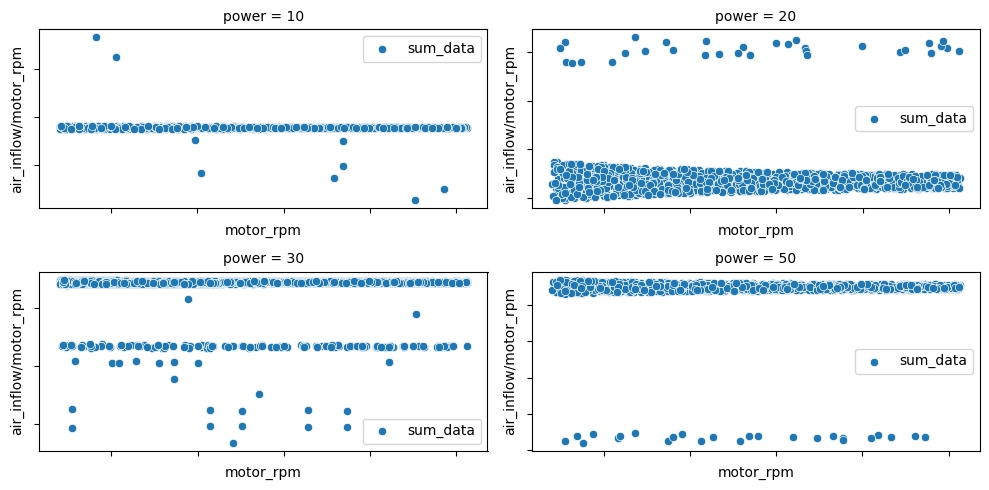

In [31]:
sub_plot_power_all(sum_data_power_10, sum_data_power_20, sum_data_power_30, sum_data_power_50, 'motor_rpm', 'air_inflow/motor_rpm')

In [32]:
from sklearn.cluster import DBSCAN
def train_dbscan(sum_data, x1, x2, eps=0.2, min_samples=7, metric='euclidean'):
    X = sum_data[x1]
    y = sum_data[x2]
    z_= np.empty((len(X),2))
    z_[:,0] = X
    z_[:,1] = y
    scaler_ = MinMaxScaler(feature_range = (-1, 1))
    X_scaled_ = scaler_.fit_transform(z_[:,0].reshape(-1,1))
    y_scaled_ = scaler_.fit_transform(z_[:,1].reshape(-1,1))
    z_scaled_ = np.empty((len(X_scaled_),2))
    z_scaled_[:,0] = X_scaled_.reshape(1,-1)
    z_scaled_[:,1] = y_scaled_.reshape(1,-1)
    #   print(pd.DataFrame(z_scaled_).info())
    dbscan_ = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    dbscan_.fit(z_scaled_)
    labels_ = dbscan_.labels_
    labels__ = np.where(labels_ == 0, 0, 1)
    # labels_[labels_ != 0] = -1
    return dbscan_, z_scaled_, labels__

In [33]:
def plot_dbscan3(dbscan, X, size, show_xlabels=True, show_ylabels=True):
#     core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
#     core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = X['label'] != 0
    real_mask = X['label'] == 0
#     non_core_mask = ~(core_mask | anomalies_mask)

#     cores = dbscan.components_
    anomalies = X[anomalies_mask]
    real = X[real_mask]
#     non_cores = X[non_core_mask]
    
#     plt.scatter(cores[:, 0], cores[:, 1],
#                 c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(real['x1'], real['x2'], marker='*', s=20, c='purple')
    plt.scatter(anomalies['x1'], anomalies['x2'],
                c="r", marker="x", s=100)
#     plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [34]:
def plot_dbscan2(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ != 0
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [35]:
def plot_dbscan(dbscan, X, labels, size, show_xlabels=True, show_ylabels=True):
    # core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    # core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = labels == -1
    real_mask = labels == 0
    # non_core_mask = ~(core_mask | anomalies_mask)

    # cores = dbscan.components_
    anomalies = X[anomalies_mask]
    real = X[real_mask]
    # non_cores = X[non_core_mask]
    
    # plt.scatter(cores[:, 0], cores[:, 1],
    #             c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(real[:, 0], real[:, 1], marker='*', s=20, c='purple')
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    # plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [36]:
dbscan, z_scaled, labels1 = train_dbscan(sum_data_power_10, 'motor_rpm', 'air_inflow/motor_rpm', eps=0.1)
dbscan2, z_scaled2, labels2 = train_dbscan(sum_data_power_20, 'motor_rpm', 'air_inflow/motor_rpm', eps=0.3)
dbscan3, z_scaled3, labels3 = train_dbscan(sum_data_power_30, 'motor_rpm', 'air_inflow/motor_rpm', eps=0.1)
dbscan4, z_scaled4, labels4 = train_dbscan(sum_data_power_50, 'motor_rpm', 'air_inflow/motor_rpm', eps=0.3)

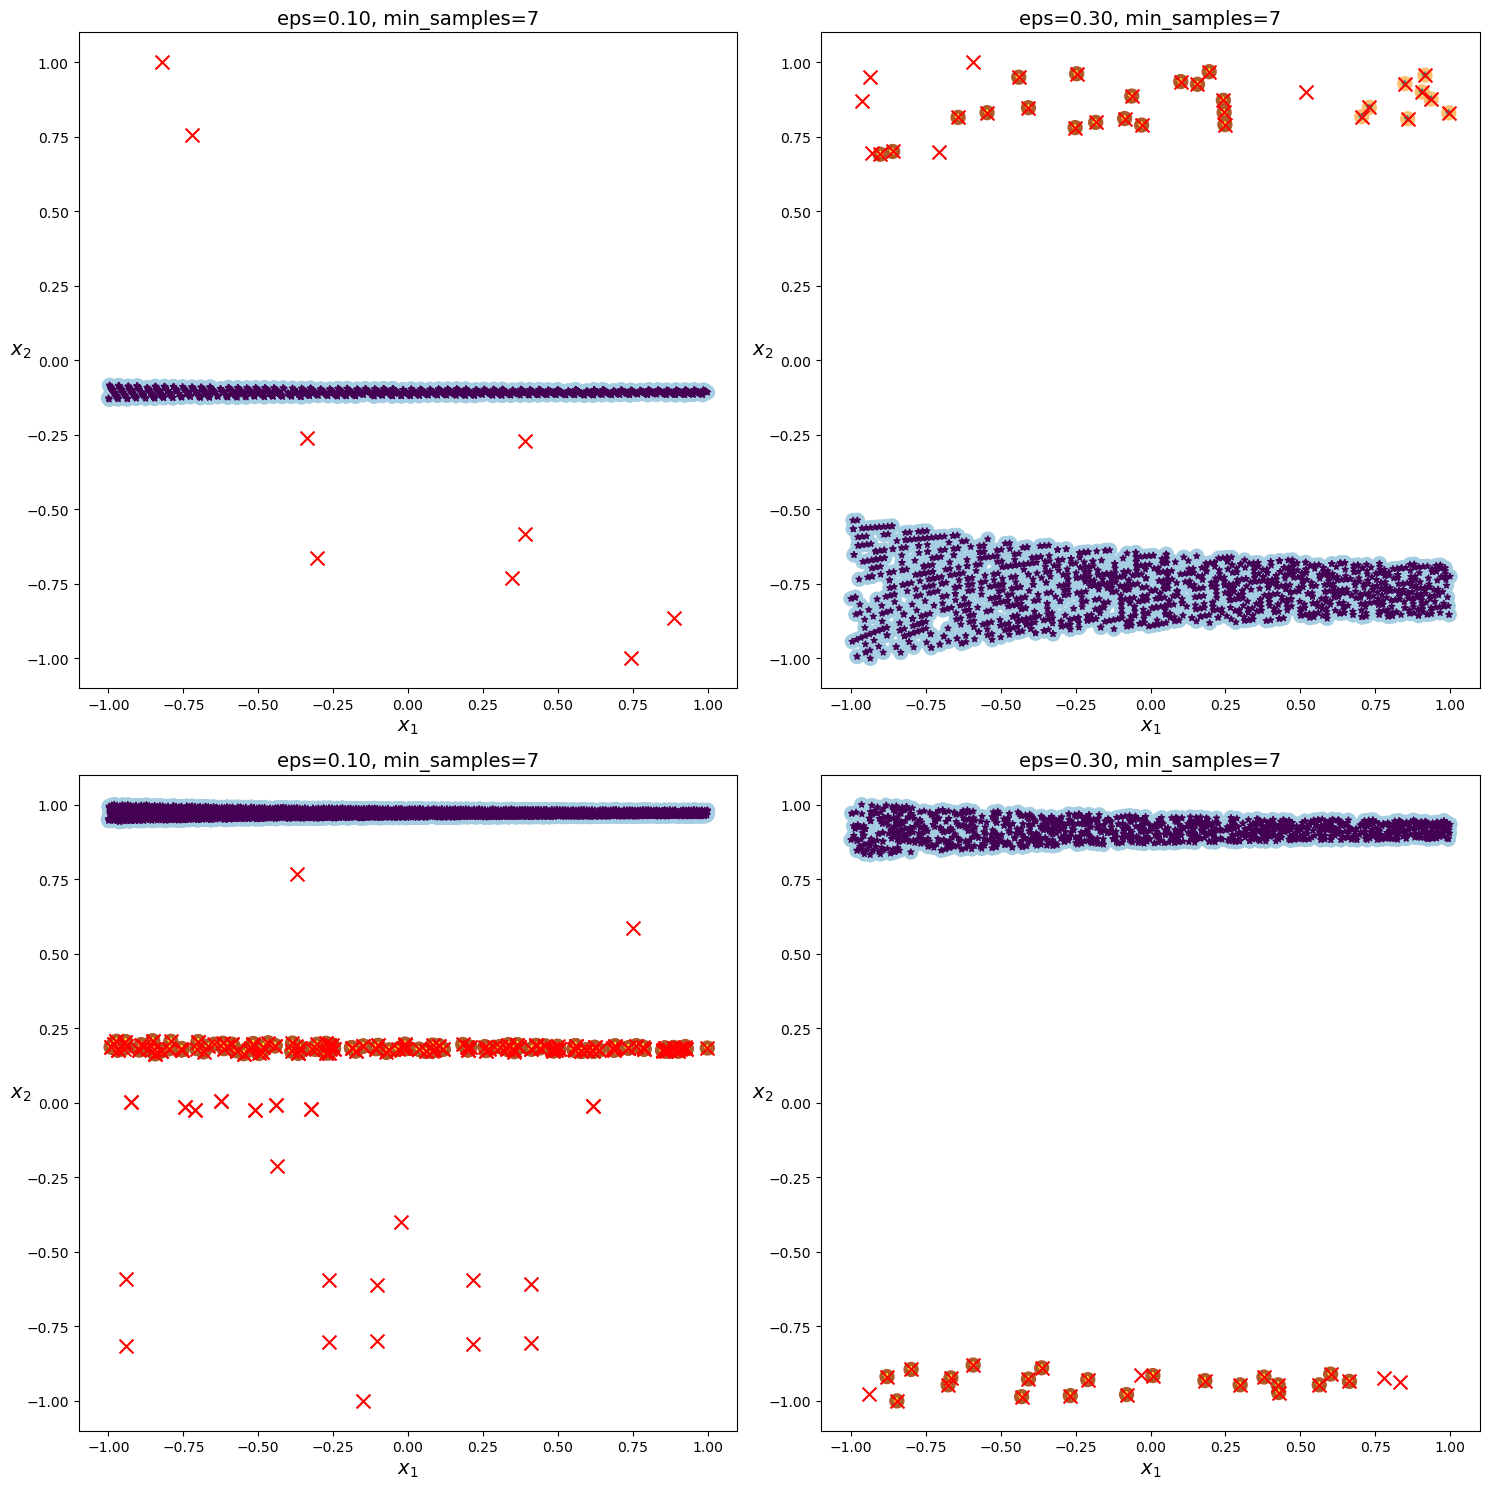

In [37]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plot_dbscan2(dbscan, z_scaled, size=100)

plt.subplot(2,2,2)
plot_dbscan2(dbscan2, z_scaled2, size=100)

plt.subplot(2,2,3)
plot_dbscan2(dbscan3,z_scaled3, size=100)

plt.subplot(2,2,4)
plot_dbscan2(dbscan4, z_scaled4, size=100)

plt.tight_layout()

In [38]:
real_data_power_10 = pd.concat([pd.DataFrame(z_scaled, columns=['x1', 'x2']),pd.DataFrame(labels1, columns=['label']),
                                sum_data_power_10['index'],sum_data_power_10['data_type']], axis=1).reset_index(drop=True)
real_data_power_20 = pd.concat([pd.DataFrame(z_scaled2, columns=['x1', 'x2']),pd.DataFrame(labels2, columns=['label']),
                               sum_data_power_20['index'],sum_data_power_20['data_type']], axis=1).reset_index(drop=True)
real_data_power_30 = pd.concat([pd.DataFrame(z_scaled3, columns=['x1', 'x2']),pd.DataFrame(labels3, columns=['label']),
                               sum_data_power_30['index'],sum_data_power_30['data_type']], axis=1).reset_index(drop=True)
real_data_power_50 = pd.concat([pd.DataFrame(z_scaled4, columns=['x1', 'x2']),pd.DataFrame(labels4, columns=['label']),
                                sum_data_power_50['index'],sum_data_power_50['data_type']], axis=1).reset_index(drop=True)

In [39]:
def sub_plot_corr(data,data2,  name1, name2):
  plt.figure(figsize=(10,5))
  correlation = data[name1].corr(data[name2])
  j = 0
  color = ['green', 'yellow', 'red']
  for i in range(8):
    globals()['data{}'.format(i)] = data[data['type'] == i]
    plt.subplot(1,2,1)
    if i == 1 or i == 2 or i == 3:
      g = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
      j += 1
    else :
      g = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color='blue')
  g.set_title("train_data", size=10)
  g.set_xticklabels(g.get_xticklabels())
  g.set_yticklabels(g.get_yticklabels())
  plt.legend(labels=['type = 0, 4, 5, 6, 7','type = 1', 'type = 2','type = 3'])
  j = 0
  for i in range(8):
    globals()['data{}'.format(i)] = data2[data2['type'] == i]
    plt.subplot(1,2,2)
    if i == 1 or i == 2 or i == 3:
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color=color[j])
      j += 1
    else :
      g2 = sns.scatterplot(data=globals()['data{}'.format(i)], x=name1, y=name2, color='blue') 
  g2.set_title("test_data", size=10)
  g2.set_xticklabels(g.get_xticklabels())
  g2.set_yticklabels(g.get_yticklabels())
  g2.set_ylim(g.get_ylim())
  plt.legend(labels=['type = 0, 4, 5, 6, 7','type = 1', 'type = 2','type = 3'])
  plt.tight_layout()
  plt.show()

In [40]:
def sub_plot_corr2(train_data, test_data, name1, name2):
    g = sns.scatterplot(data=train_data, x=name1, y=name2, markers='*' )
    g = sns.scatterplot(data=test_data, x=name1, y=name2, s=20)
    g.set_title("train_data & test_data", size=10)
    g.set_xticklabels(g.get_xticklabels())
    g.set_yticklabels(g.get_yticklabels())
    plt.legend(labels=['train','test'])
    plt.show()

In [41]:
train_data_power_30 = pd.concat([train_data_0, train_data_4, train_data_5, train_data_6, train_data_7]).reset_index()
train_data_power_20 = train_data_1
train_data_power_10 = train_data_2
train_data_power_50 = train_data_3
test_data_power_30 = pd.concat([test_data_0, test_data_4, test_data_5, test_data_6, test_data_7]).reset_index()
test_data_power_20 = test_data_1
test_data_power_10 = test_data_2
test_data_power_50 = test_data_3

In [42]:
import numpy as np
import scipy as sp

def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.euclidean):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 

    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

In [43]:
dbscan_predict(dbscan, np.array([[-0.5, -0.6],[0,0]]))

array([-1,  0])

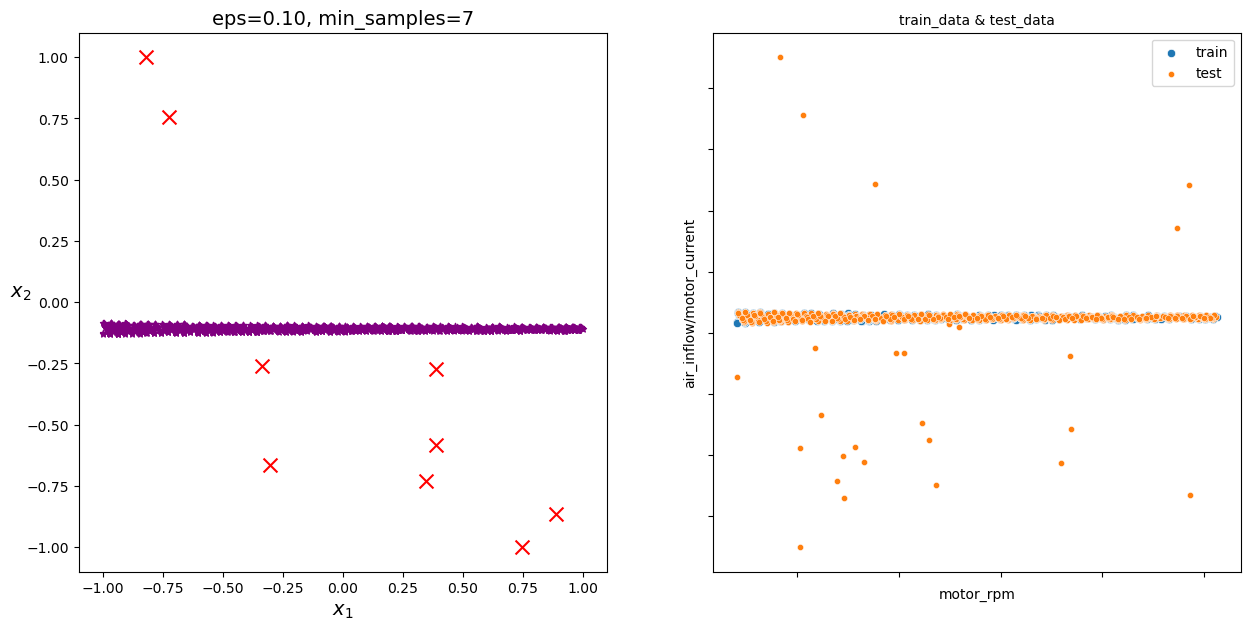

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan, real_data_power_10, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_10, test_data_power_10, 'motor_rpm', 'air_inflow/motor_current')

plt.tight_layout()

In [45]:
real_data_power_10['label'][610:612] = 0
real_data_power_20['label'][real_data_power_20[real_data_power_20['x2'] > 0]['label'].index] = 0
real_data_power_50['label'][real_data_power_50[real_data_power_50['x2'] < 0]['label'].index] = 0

In [46]:
final_data = pd.concat([real_data_power_10[real_data_power_10['data_type'] == 'test'], real_data_power_20[real_data_power_20['data_type'] == 'test'],
           real_data_power_30[real_data_power_30['data_type'] == 'test'], real_data_power_50[real_data_power_50['data_type'] == 'test']])

In [47]:
final_data.sort_values(by='index', inplace=True)
final_data.reset_index(drop=True, inplace=True)

In [48]:
submission['label'] = final_data['label']

# rpm당  공기흡입량 완료

# 전류당 진동

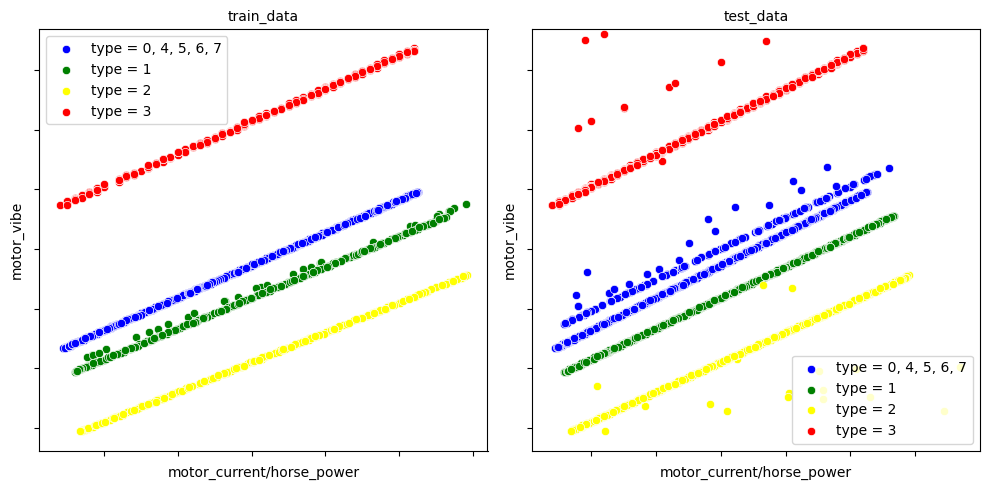

In [49]:
sub_plot_corr(train_data, test_data, 'motor_current/horse_power', 'motor_vibe')

In [412]:
dbscan, z_scaled, labels1 = train_dbscan(sum_data_power_10, 'motor_current/horse_power', 'motor_vibe', eps=0.025)
dbscan2, z_scaled2, labels2 = train_dbscan(sum_data_power_20, 'motor_current/horse_power', 'motor_vibe', eps=0.3)
dbscan3, z_scaled3, labels3 = train_dbscan(sum_data_power_30, 'motor_current/horse_power', 'motor_vibe', eps=0.1)
dbscan4, z_scaled4, labels4 = train_dbscan(sum_data_power_50, 'motor_current/horse_power', 'motor_vibe', eps=0.05)

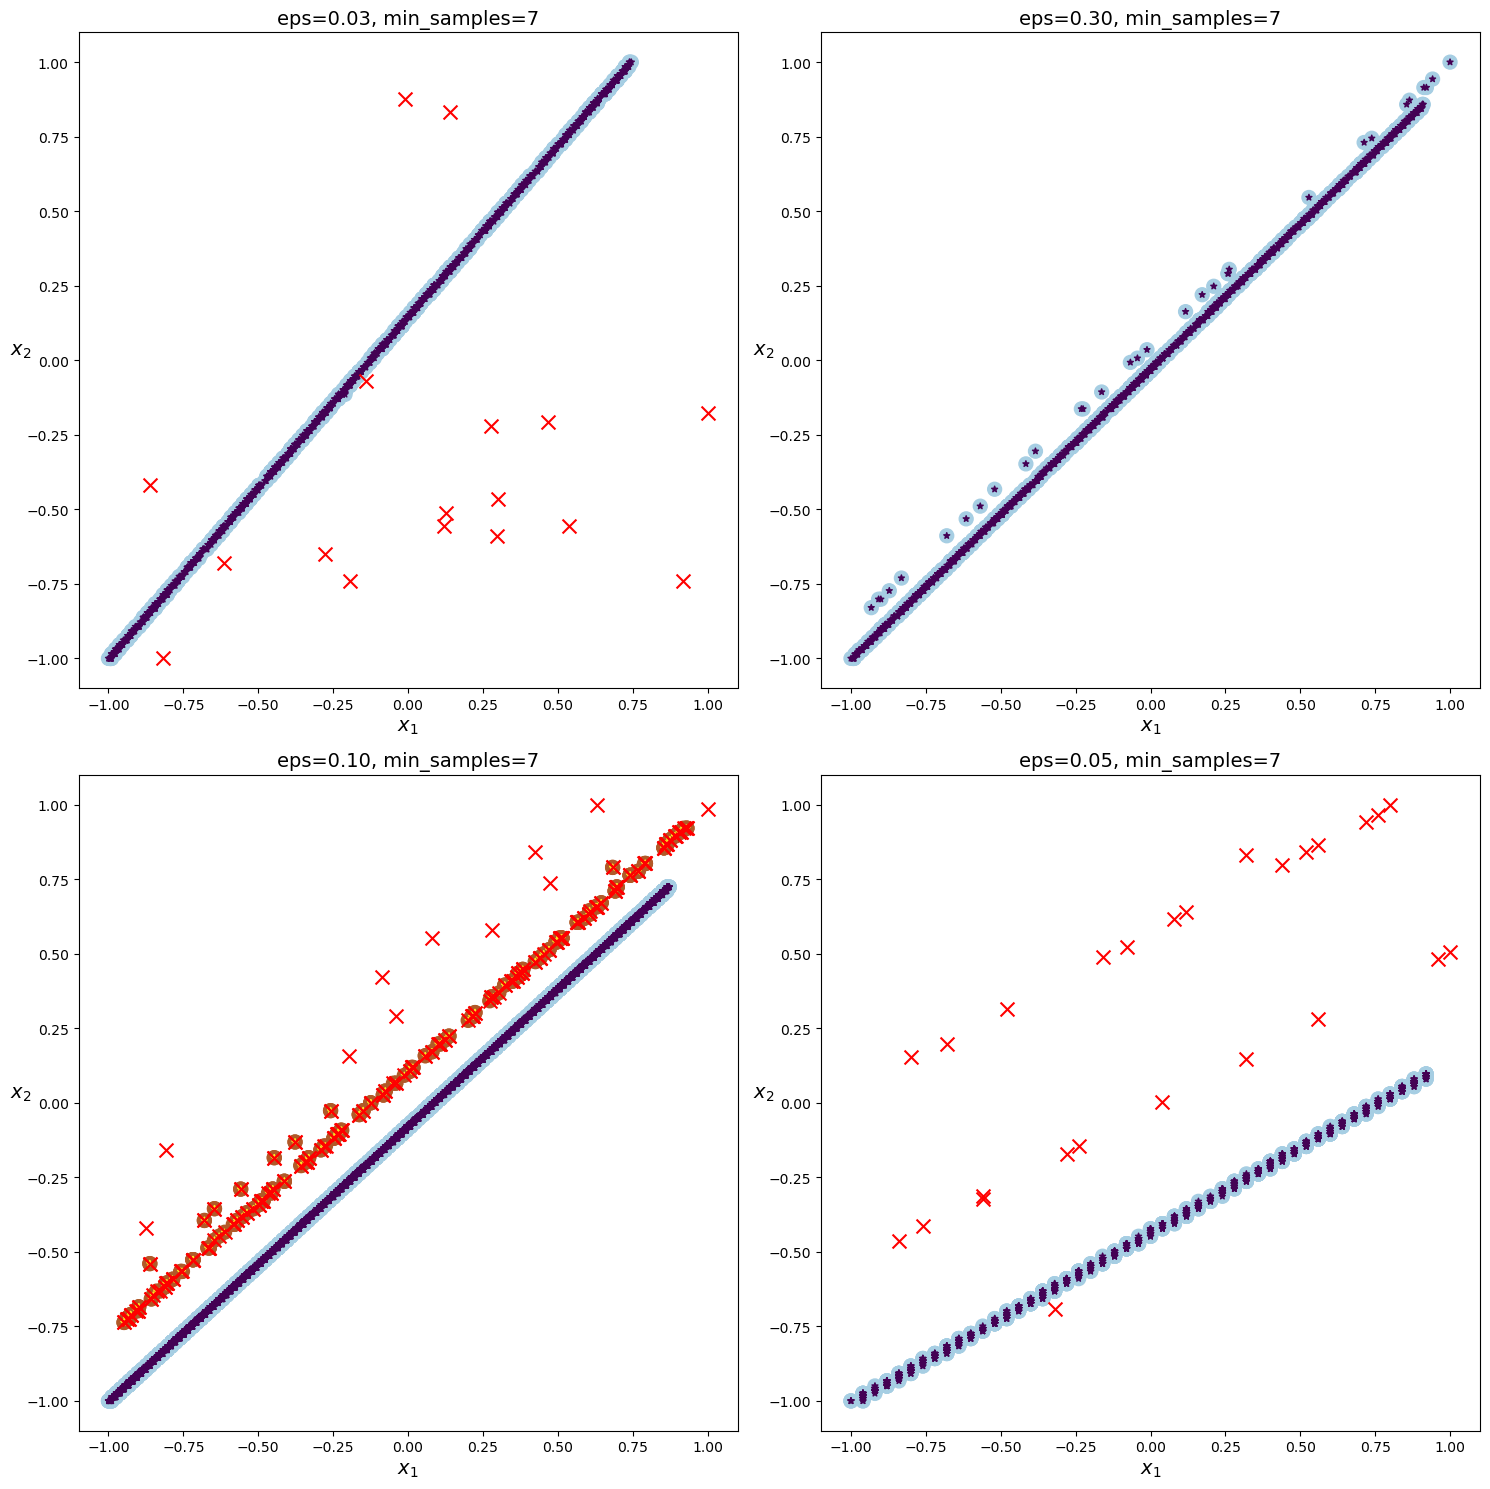

In [413]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plot_dbscan2(dbscan, z_scaled, size=100)

plt.subplot(2,2,2)
plot_dbscan2(dbscan2, z_scaled2, size=100)

plt.subplot(2,2,3)
plot_dbscan2(dbscan3,z_scaled3, size=100)

plt.subplot(2,2,4)
plot_dbscan2(dbscan4, z_scaled4, size=100)

plt.tight_layout()

In [414]:
real_data_power_10 = pd.concat([pd.DataFrame(z_scaled, columns=['x1', 'x2']),pd.DataFrame(labels1, columns=['label']),
                                sum_data_power_10['index'],sum_data_power_10['data_type']], axis=1).reset_index(drop=True)
real_data_power_20 = pd.concat([pd.DataFrame(z_scaled2, columns=['x1', 'x2']),pd.DataFrame(labels2, columns=['label']),
                               sum_data_power_20['index'],sum_data_power_20['data_type']], axis=1).reset_index(drop=True)
real_data_power_30 = pd.concat([pd.DataFrame(z_scaled3, columns=['x1', 'x2']),pd.DataFrame(labels3, columns=['label']),
                               sum_data_power_30['index'],sum_data_power_30['data_type']], axis=1).reset_index(drop=True)
real_data_power_50 = pd.concat([pd.DataFrame(z_scaled4, columns=['x1', 'x2']),pd.DataFrame(labels4, columns=['label']),
                                sum_data_power_50['index'],sum_data_power_50['data_type']], axis=1).reset_index(drop=True)

In [415]:
train_data_power_30 = pd.concat([train_data_0, train_data_4, train_data_5, train_data_6, train_data_7]).reset_index()
train_data_power_20 = train_data_1
train_data_power_10 = train_data_2
train_data_power_50 = train_data_3
test_data_power_30 = pd.concat([test_data_0, test_data_4, test_data_5, test_data_6, test_data_7]).reset_index()
test_data_power_20 = test_data_1
test_data_power_10 = test_data_2
test_data_power_50 = test_data_3

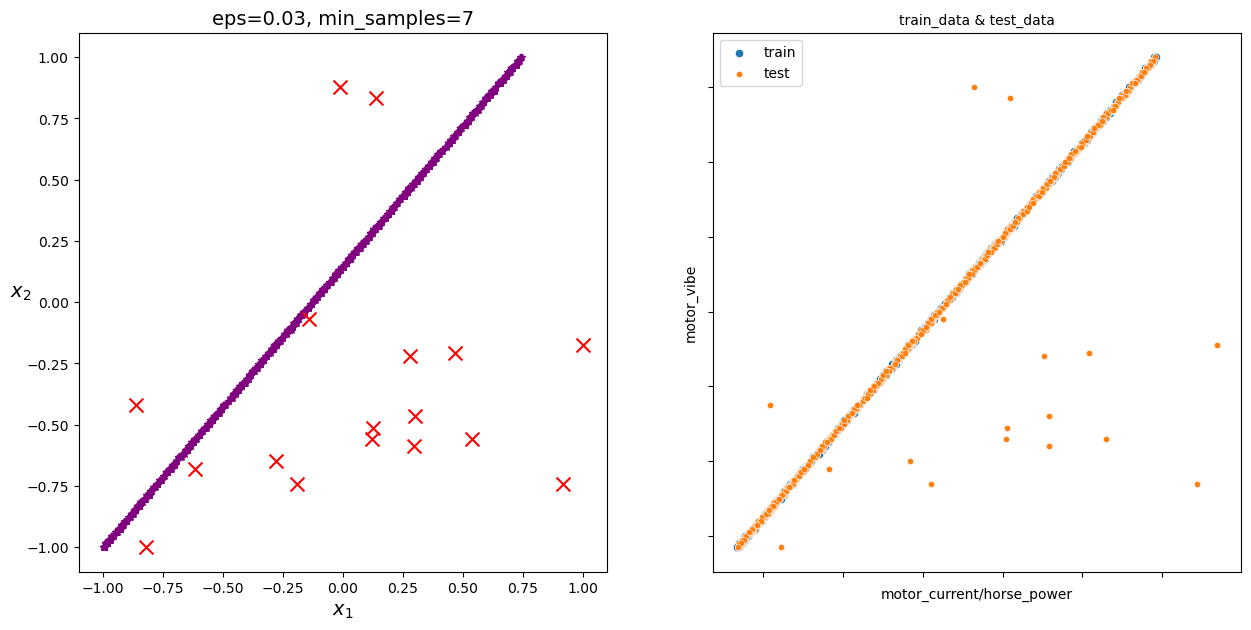

<Figure size 640x480 with 0 Axes>

In [416]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan, real_data_power_10, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_10, test_data_power_10, 'motor_current/horse_power', 'motor_vibe')

plt.tight_layout()

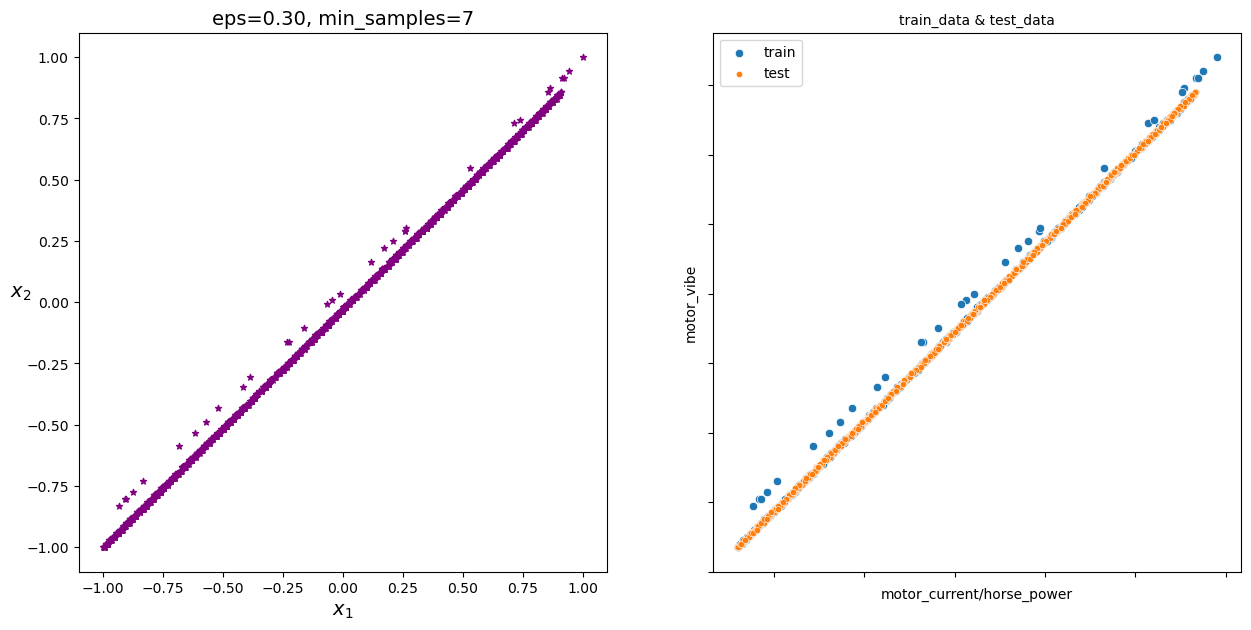

<Figure size 640x480 with 0 Axes>

In [417]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan2, real_data_power_20, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_20, test_data_power_20, 'motor_current/horse_power', 'motor_vibe')

plt.tight_layout()

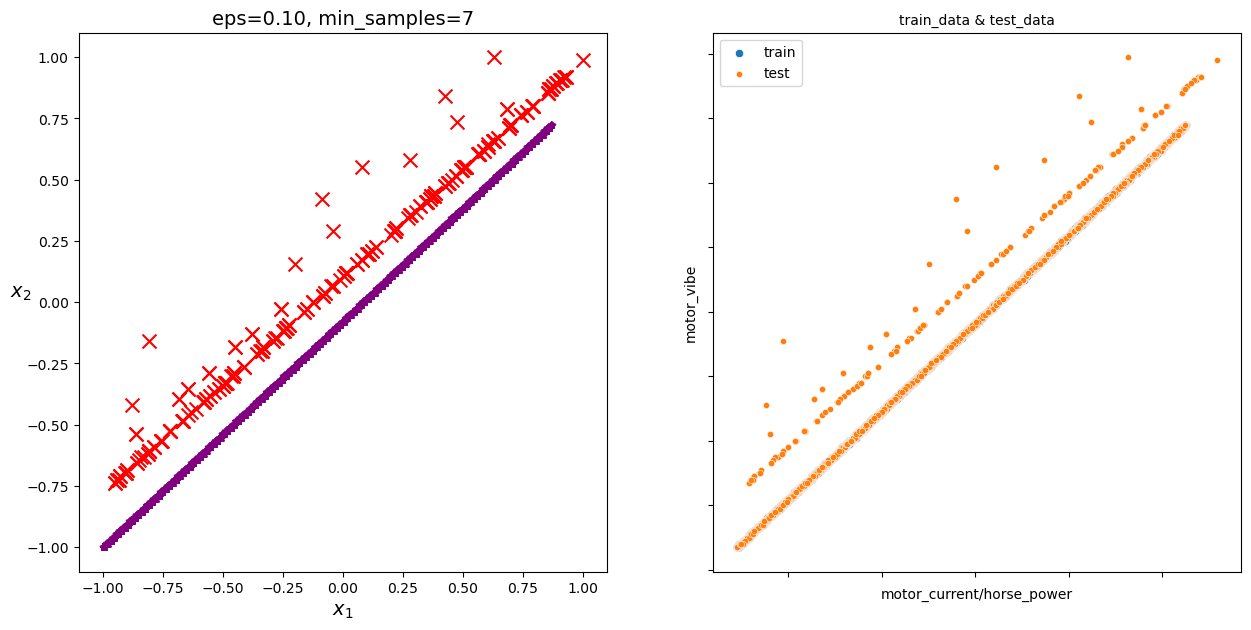

<Figure size 640x480 with 0 Axes>

In [418]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan3, real_data_power_30, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_30, test_data_power_30, 'motor_current/horse_power', 'motor_vibe')

plt.tight_layout()

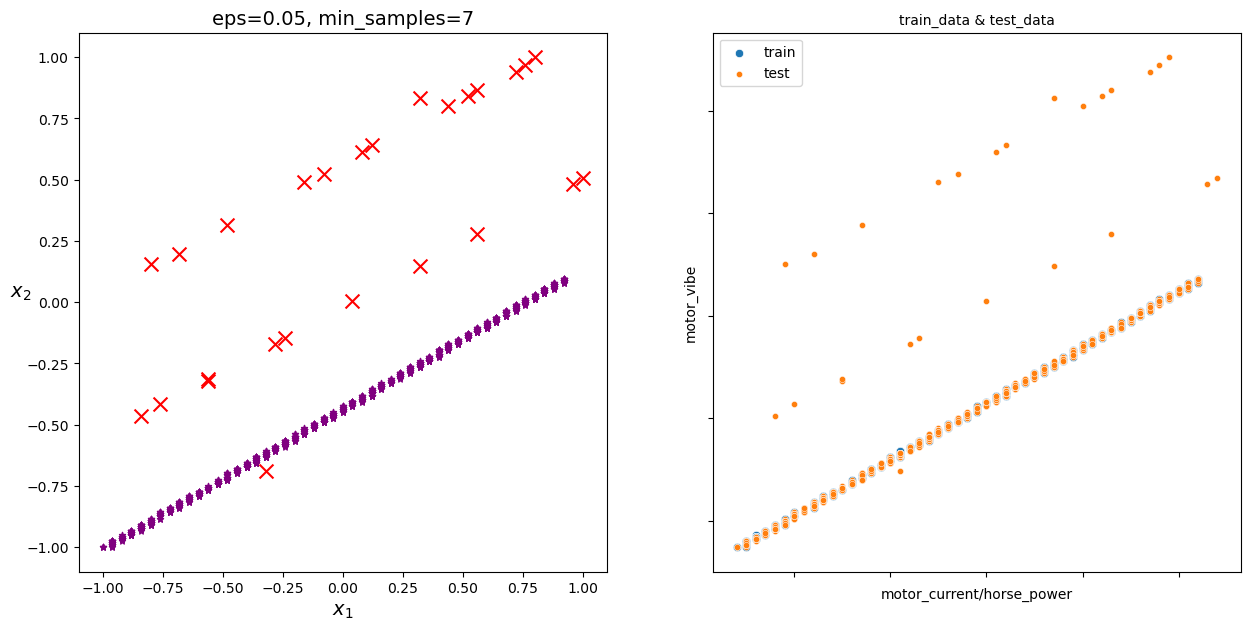

<Figure size 640x480 with 0 Axes>

In [419]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan4, real_data_power_50, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_50, test_data_power_50, 'motor_current/horse_power', 'motor_vibe')

plt.tight_layout()

In [420]:
final_data = pd.concat([real_data_power_10[real_data_power_10['data_type'] == 'test'], real_data_power_20[real_data_power_20['data_type'] == 'test'],
           real_data_power_30[real_data_power_30['data_type'] == 'test'], real_data_power_50[real_data_power_50['data_type'] == 'test']])

In [421]:
final_data.sort_values(by='index', inplace=True)
final_data.reset_index(drop=True, inplace=True)

In [422]:
submission['label'][final_data[final_data['label'] == 1]['label'].index] = 1

In [424]:
submission['label'][test_data[test_data['out_pressure'] != 0.7]['out_pressure'].index] = 1

In [425]:
submission['label'].value_counts()

0    7048
1     341
Name: label, dtype: int64

In [427]:
submission5['label'].value_counts()

0    7047
1     342
Name: label, dtype: int64

In [426]:
submission.to_csv('submission6.csv', index=False)

# 전류당 온도

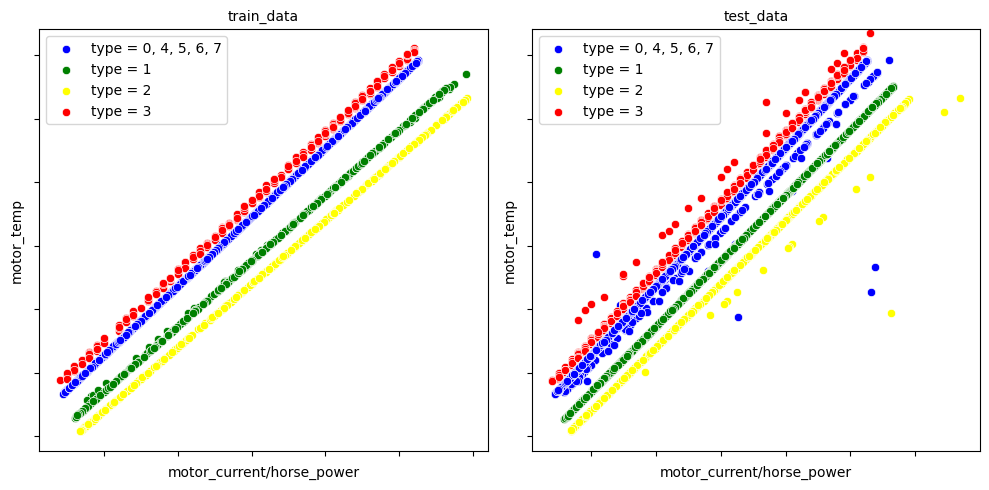

In [62]:
sub_plot_corr(train_data, test_data, 'motor_current/horse_power', 'motor_temp')

In [314]:
dbscan, z_scaled, labels1 = train_dbscan(sum_data_power_10, 'motor_current/horse_power', 'motor_temp', eps=0.05)
dbscan2, z_scaled2, labels2 = train_dbscan(sum_data_power_20, 'motor_current/horse_power', 'motor_temp', eps=0.3)
dbscan3, z_scaled3, labels3 = train_dbscan(sum_data_power_30, 'motor_current/horse_power', 'motor_temp', eps=0.01)
dbscan4, z_scaled4, labels4 = train_dbscan(sum_data_power_50, 'motor_current/horse_power', 'motor_temp', eps=0.045)
dbscan4_, z_scaled4_, labels4_ = train_dbscan(sum_data_power_50, 'motor_current/horse_power', 'motor_temp', eps=0.05)

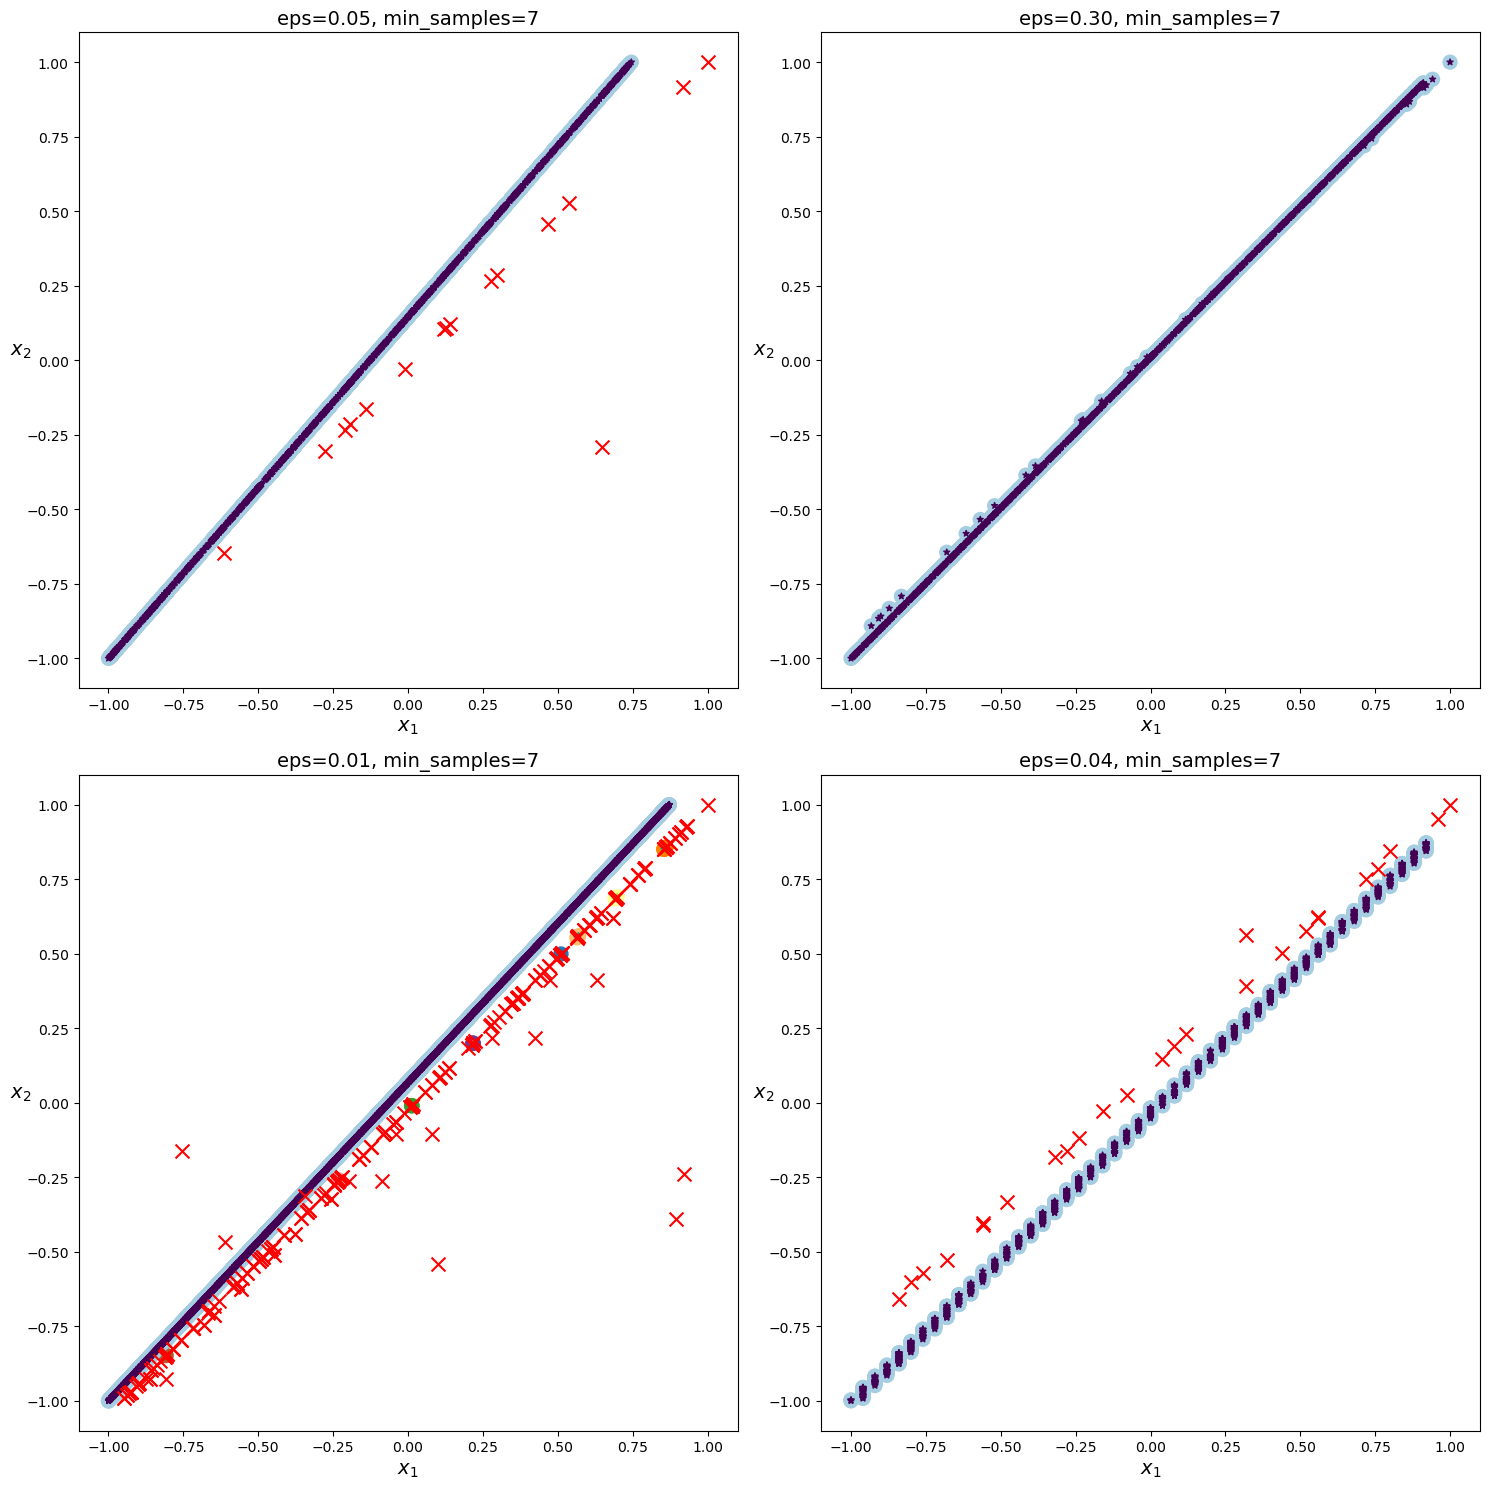

In [315]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plot_dbscan2(dbscan, z_scaled, size=100)

plt.subplot(2,2,2)
plot_dbscan2(dbscan2, z_scaled2, size=100)

plt.subplot(2,2,3)
plot_dbscan2(dbscan3,z_scaled3, size=100)

plt.subplot(2,2,4)
plot_dbscan2(dbscan4, z_scaled4, size=100)

plt.tight_layout()

In [316]:
real_data_power_10 = pd.concat([pd.DataFrame(z_scaled, columns=['x1', 'x2']),pd.DataFrame(labels1, columns=['label']),
                                sum_data_power_10['index'],sum_data_power_10['data_type']], axis=1).reset_index(drop=True)
real_data_power_20 = pd.concat([pd.DataFrame(z_scaled2, columns=['x1', 'x2']),pd.DataFrame(labels2, columns=['label']),
                               sum_data_power_20['index'],sum_data_power_20['data_type']], axis=1).reset_index(drop=True)
real_data_power_30 = pd.concat([pd.DataFrame(z_scaled3, columns=['x1', 'x2']),pd.DataFrame(labels3, columns=['label']),
                               sum_data_power_30['index'],sum_data_power_30['data_type']], axis=1).reset_index(drop=True)
real_data_power_50 = pd.concat([pd.DataFrame(z_scaled4, columns=['x1', 'x2']),pd.DataFrame(labels4, columns=['label']),
                                sum_data_power_50['index'],sum_data_power_50['data_type']], axis=1).reset_index(drop=True)
real_data_power_50_ = pd.concat([pd.DataFrame(z_scaled4_, columns=['x1', 'x2']),pd.DataFrame(labels4_, columns=['label']),
                                sum_data_power_50['index'],sum_data_power_50['data_type']], axis=1).reset_index(drop=True)

In [317]:
train_data_power_30 = pd.concat([train_data_0, train_data_4, train_data_5, train_data_6, train_data_7]).reset_index()
train_data_power_20 = train_data_1
train_data_power_10 = train_data_2
train_data_power_50 = train_data_3
test_data_power_30 = pd.concat([test_data_0, test_data_4, test_data_5, test_data_6, test_data_7]).reset_index()
test_data_power_20 = test_data_1
test_data_power_10 = test_data_2
test_data_power_50 = test_data_3

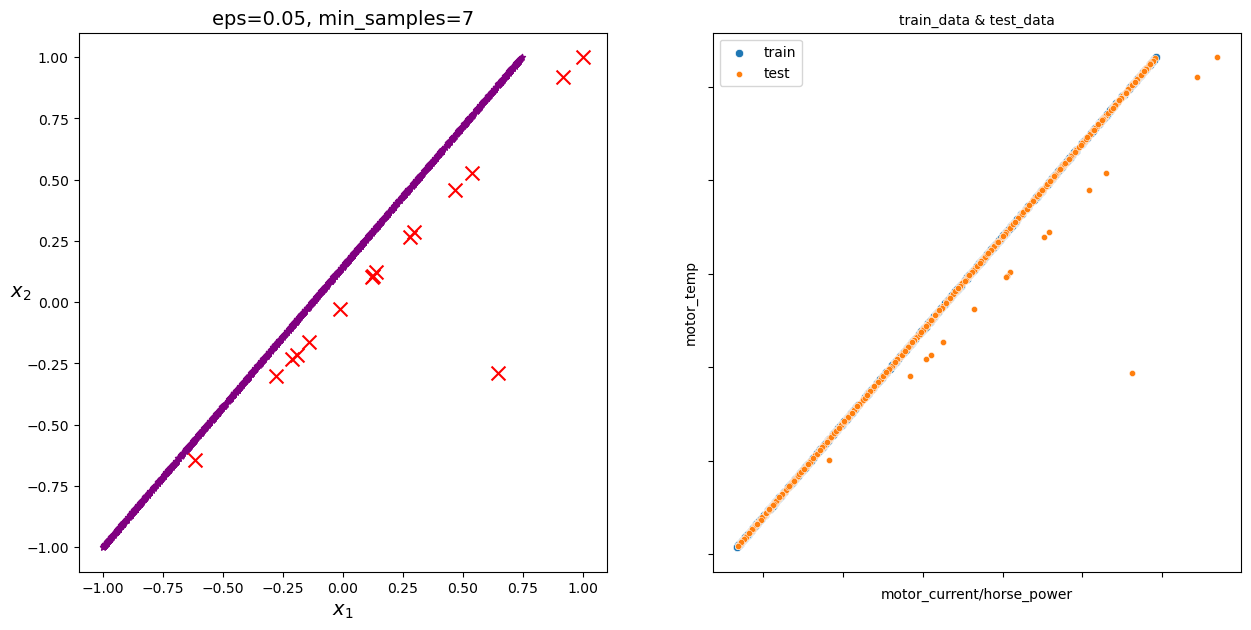

<Figure size 640x480 with 0 Axes>

In [318]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan, real_data_power_10, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_10, test_data_power_10, 'motor_current/horse_power', 'motor_temp')

plt.tight_layout()

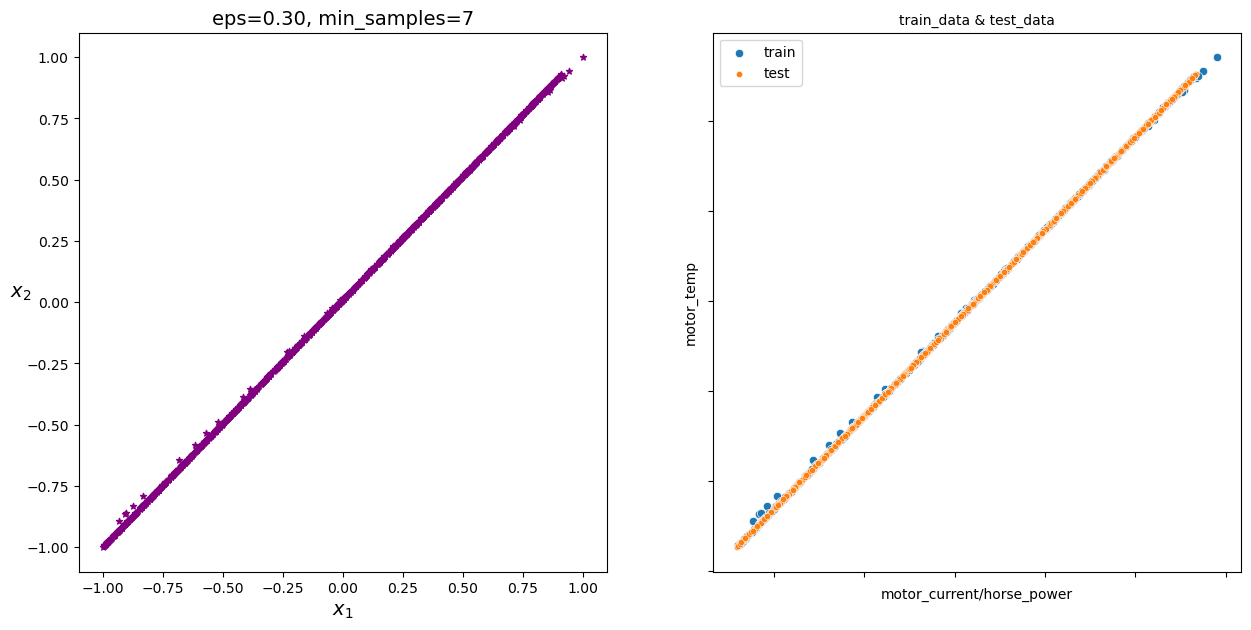

<Figure size 640x480 with 0 Axes>

In [319]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan2, real_data_power_20, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_20, test_data_power_20, 'motor_current/horse_power', 'motor_temp')

plt.tight_layout()

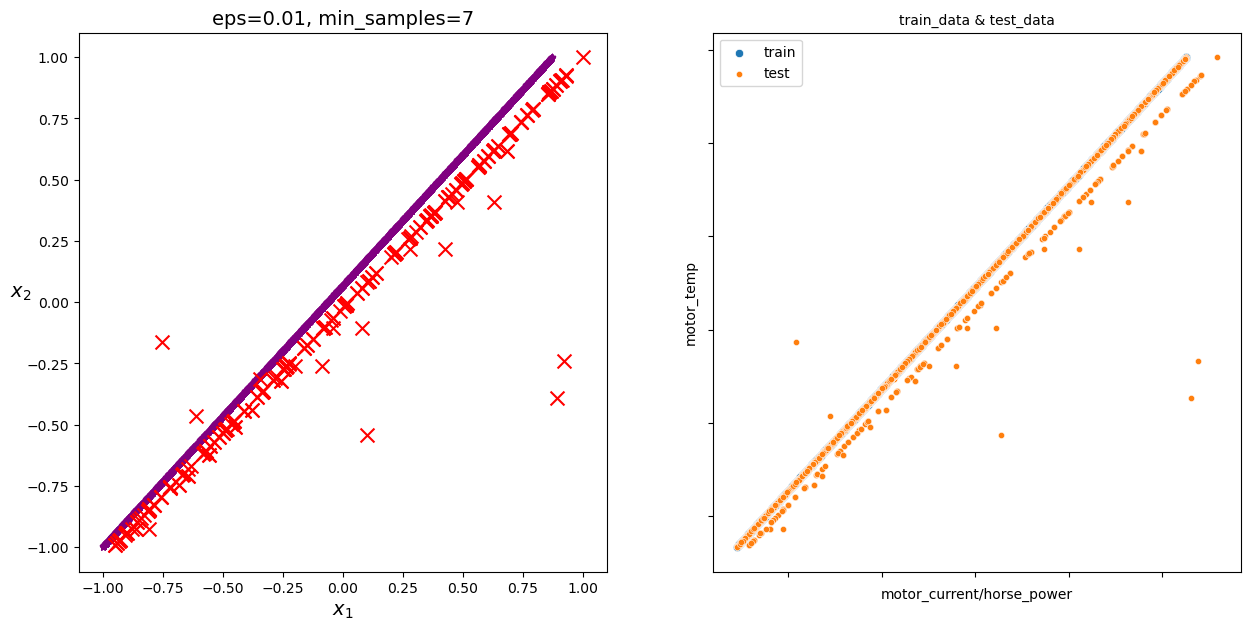

<Figure size 640x480 with 0 Axes>

In [320]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan3, real_data_power_30, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_30, test_data_power_30, 'motor_current/horse_power', 'motor_temp')

plt.tight_layout()

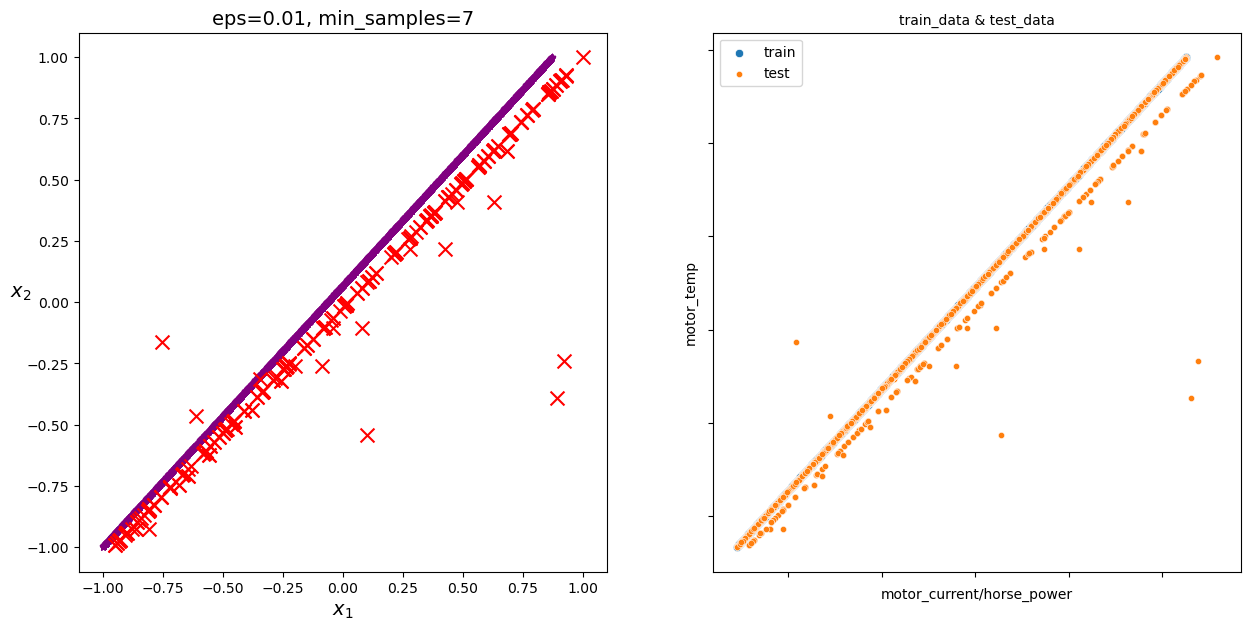

<Figure size 640x480 with 0 Axes>

In [321]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan3, real_data_power_30, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_30, test_data_power_30, 'motor_current/horse_power', 'motor_temp')

plt.tight_layout()

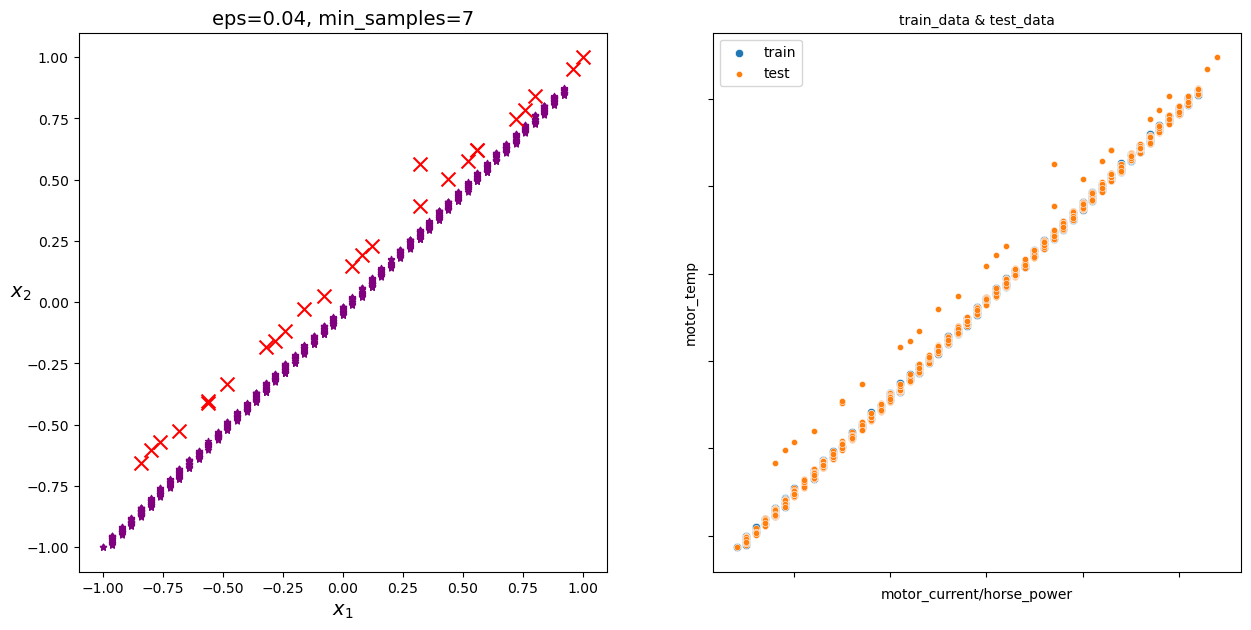

<Figure size 640x480 with 0 Axes>

In [322]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan4, real_data_power_50, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_50, test_data_power_50, 'motor_current/horse_power', 'motor_temp')

plt.tight_layout()

In [323]:
real_data_power_50_['label'].value_counts()

0    1200
1      24
Name: label, dtype: int64

In [324]:
real_data_power_50['label'].value_counts()

0    1198
1      26
Name: label, dtype: int64

In [335]:
real_data_power_50[real_data_power_50_['label'] != real_data_power_50['label']]

x1       x2  label  index data_type
760  0.76  0.78467      1   3955      test
765  0.72  0.74902      1   3960      test

In [352]:
final_data = pd.concat([real_data_power_10[real_data_power_10['data_type'] == 'test'], real_data_power_20[real_data_power_20['data_type'] == 'test'],
           real_data_power_30[real_data_power_30['data_type'] == 'test'], real_data_power_50[real_data_power_50['data_type'] == 'test']])

In [353]:
final_data.sort_values(by='index', inplace=True)
final_data.reset_index(drop=True, inplace=True)

In [354]:
submission.value_counts('label')

label
0    7057
1     332
dtype: int64

In [355]:
final_data['label'].value_counts()

0    7069
1     320
Name: label, dtype: int64

In [356]:
submission2 = submission.copy()

In [357]:
#3955, 3960
#real_data_power_50[real_data_power_50['label'] != real_data_power_50_['label']]['index']

In [358]:
submission2['label'][final_data[final_data['label'] == 1]['label'].index] = 1
submission2['label'][[3955, 3960]]

3955    1
3960    1
Name: label, dtype: int32

In [359]:
submission2.value_counts('label')

label
0    7054
1     335
dtype: int64

In [360]:
submission2.value_counts('label')

label
0    7054
1     335
dtype: int64

In [232]:
submission2.to_csv('submission4.csv', index=False)

# 모터온도당 말단 온도

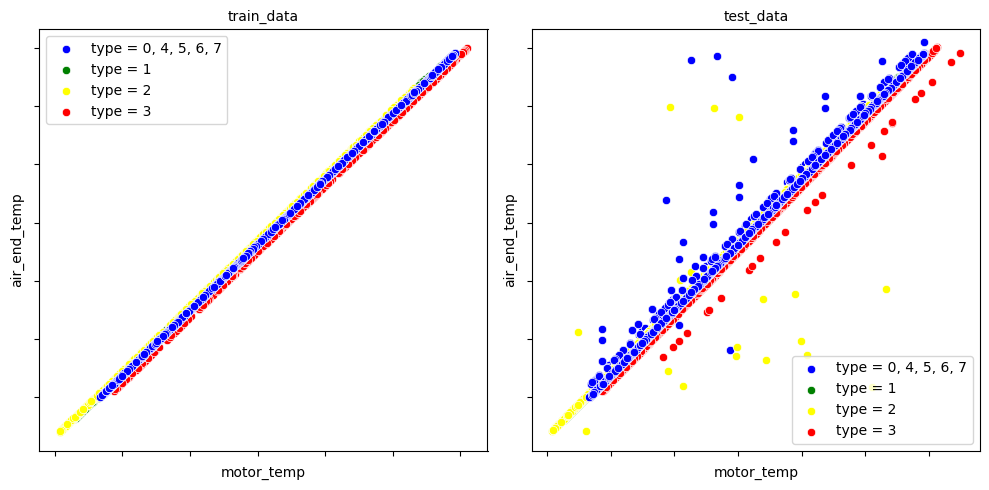

In [233]:
sub_plot_corr(train_data, test_data, 'motor_temp', 'air_end_temp')

In [234]:
dbscan, z_scaled, labels1 = train_dbscan(sum_data_power_10, 'motor_temp', 'air_end_temp', eps=0.05)
dbscan2, z_scaled2, labels2 = train_dbscan(sum_data_power_20, 'motor_temp', 'air_end_temp', eps=0.3)
dbscan3, z_scaled3, labels3 = train_dbscan(sum_data_power_30, 'motor_temp', 'air_end_temp', eps=0.01)
dbscan4, z_scaled4, labels4 = train_dbscan(sum_data_power_50, 'motor_temp', 'air_end_temp', eps=0.05)

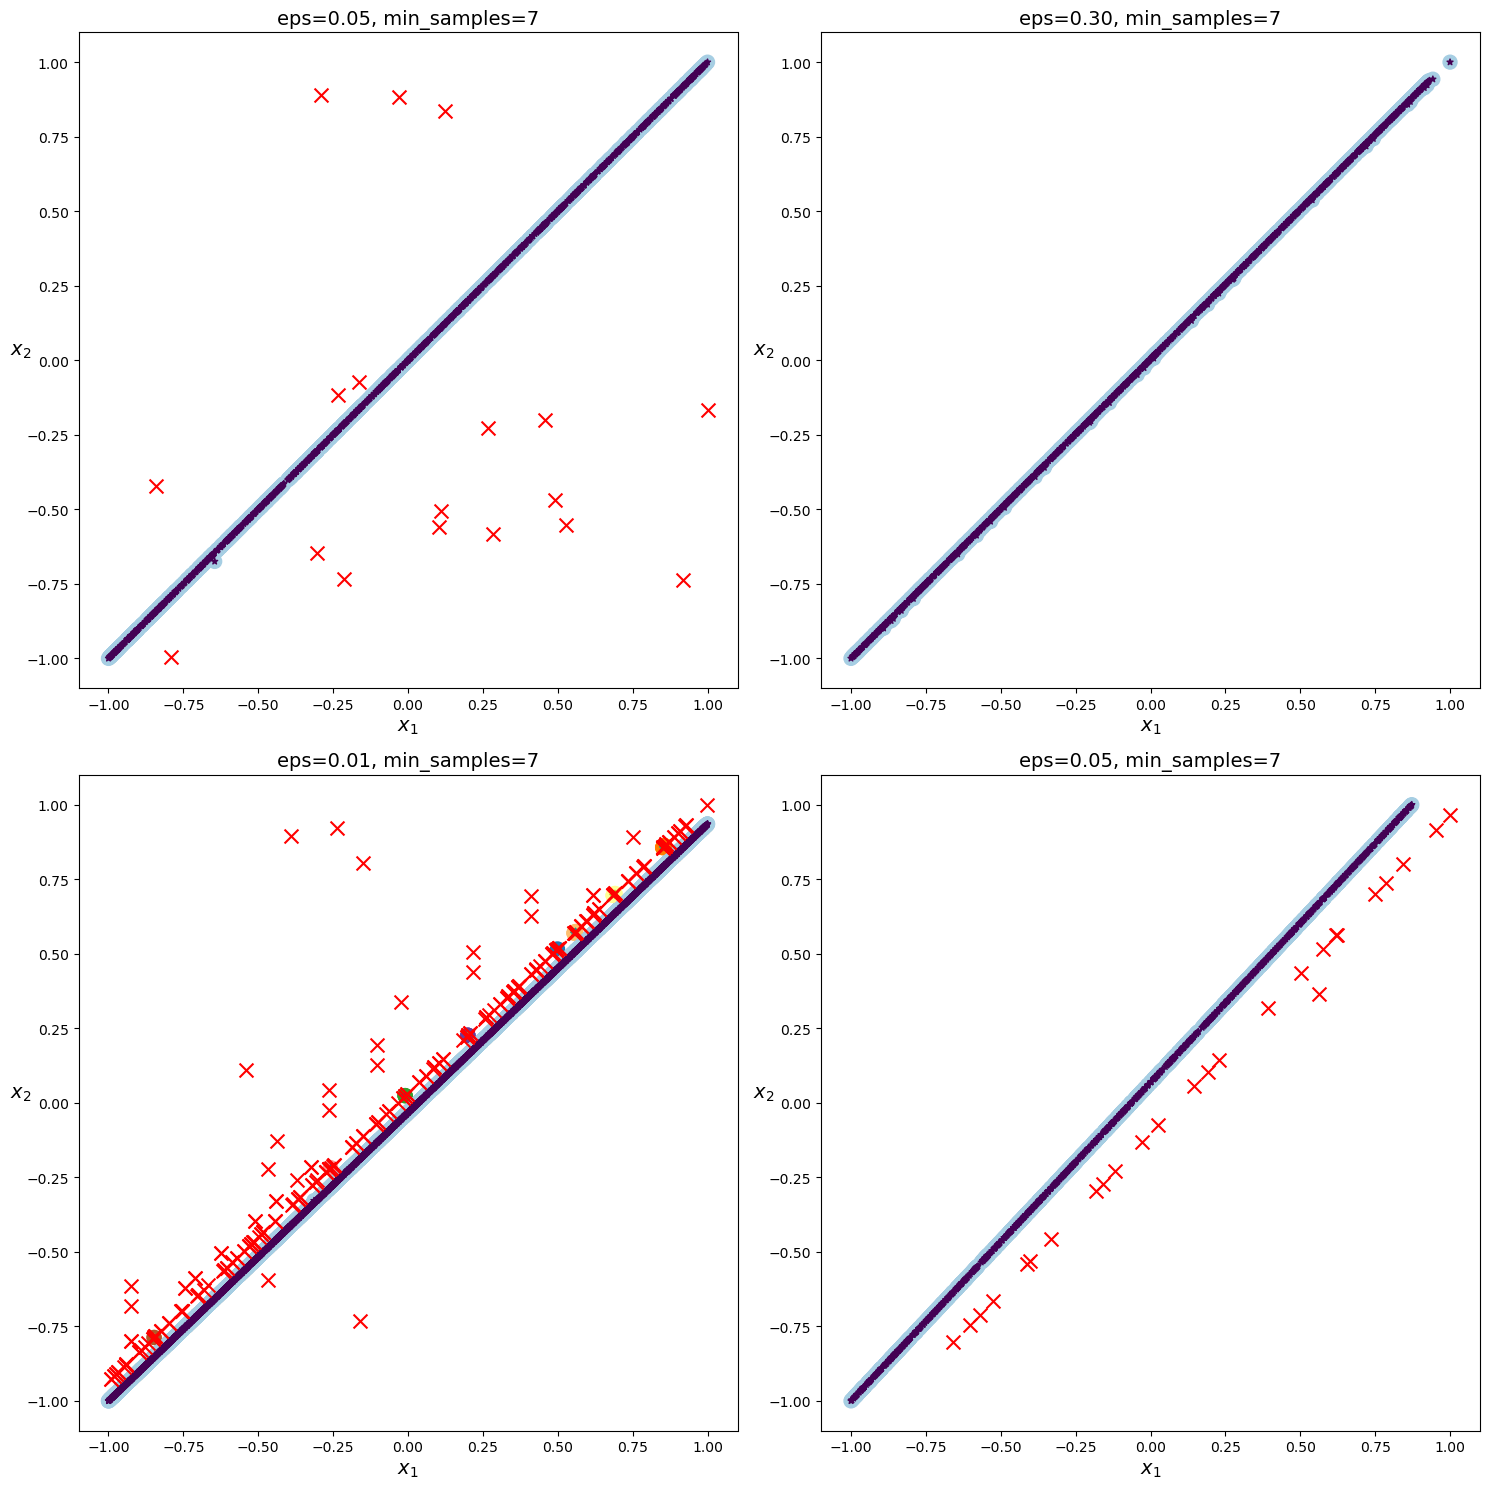

In [235]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plot_dbscan2(dbscan, z_scaled, size=100)

plt.subplot(2,2,2)
plot_dbscan2(dbscan2, z_scaled2, size=100)

plt.subplot(2,2,3)
plot_dbscan2(dbscan3,z_scaled3, size=100)

plt.subplot(2,2,4)
plot_dbscan2(dbscan4, z_scaled4, size=100)

plt.tight_layout()

In [236]:
real_data_power_10 = pd.concat([pd.DataFrame(z_scaled, columns=['x1', 'x2']),pd.DataFrame(labels1, columns=['label']),
                                sum_data_power_10['index'],sum_data_power_10['data_type']], axis=1).reset_index(drop=True)
real_data_power_20 = pd.concat([pd.DataFrame(z_scaled2, columns=['x1', 'x2']),pd.DataFrame(labels2, columns=['label']),
                               sum_data_power_20['index'],sum_data_power_20['data_type']], axis=1).reset_index(drop=True)
real_data_power_30 = pd.concat([pd.DataFrame(z_scaled3, columns=['x1', 'x2']),pd.DataFrame(labels3, columns=['label']),
                               sum_data_power_30['index'],sum_data_power_30['data_type']], axis=1).reset_index(drop=True)
real_data_power_50 = pd.concat([pd.DataFrame(z_scaled4, columns=['x1', 'x2']),pd.DataFrame(labels4, columns=['label']),
                                sum_data_power_50['index'],sum_data_power_50['data_type']], axis=1).reset_index(drop=True)

In [237]:
train_data_power_30 = pd.concat([train_data_0, train_data_4, train_data_5, train_data_6, train_data_7]).reset_index()
train_data_power_20 = train_data_1
train_data_power_10 = train_data_2
train_data_power_50 = train_data_3
test_data_power_30 = pd.concat([test_data_0, test_data_4, test_data_5, test_data_6, test_data_7]).reset_index()
test_data_power_20 = test_data_1
test_data_power_10 = test_data_2
test_data_power_50 = test_data_3

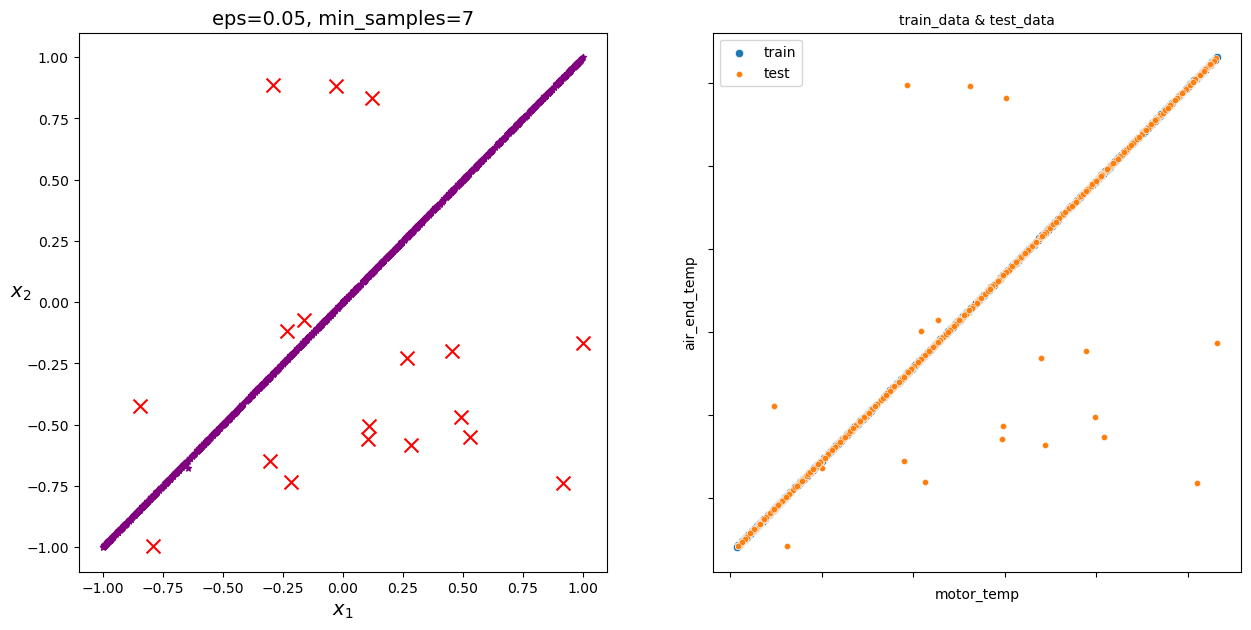

<Figure size 640x480 with 0 Axes>

In [238]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan, real_data_power_10, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_10, test_data_power_10, 'motor_temp', 'air_end_temp')

plt.tight_layout()

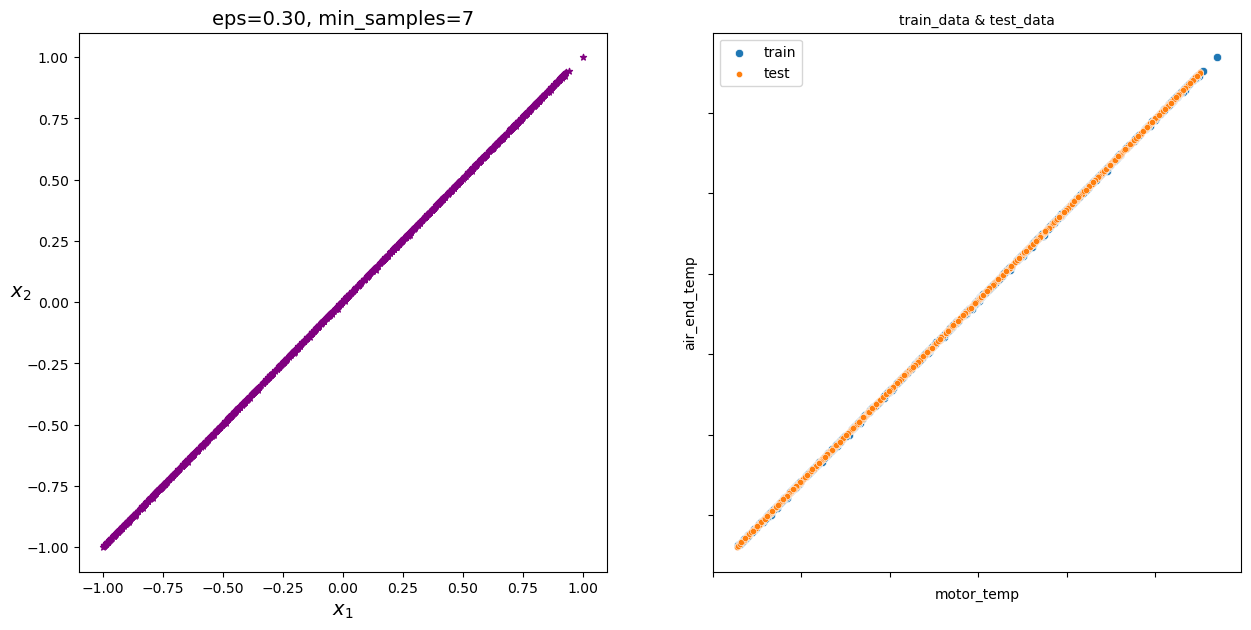

<Figure size 640x480 with 0 Axes>

In [239]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan2, real_data_power_20, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_20, test_data_power_20, 'motor_temp', 'air_end_temp')

plt.tight_layout()

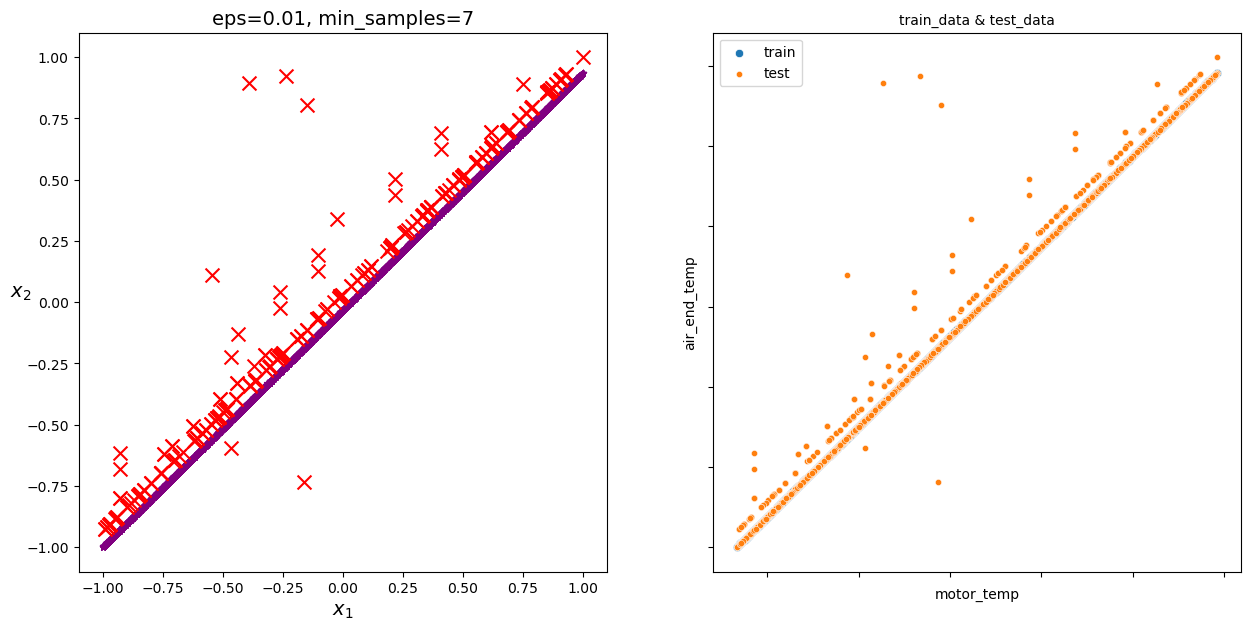

<Figure size 640x480 with 0 Axes>

In [240]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan3, real_data_power_30, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_30, test_data_power_30, 'motor_temp', 'air_end_temp')

plt.tight_layout()

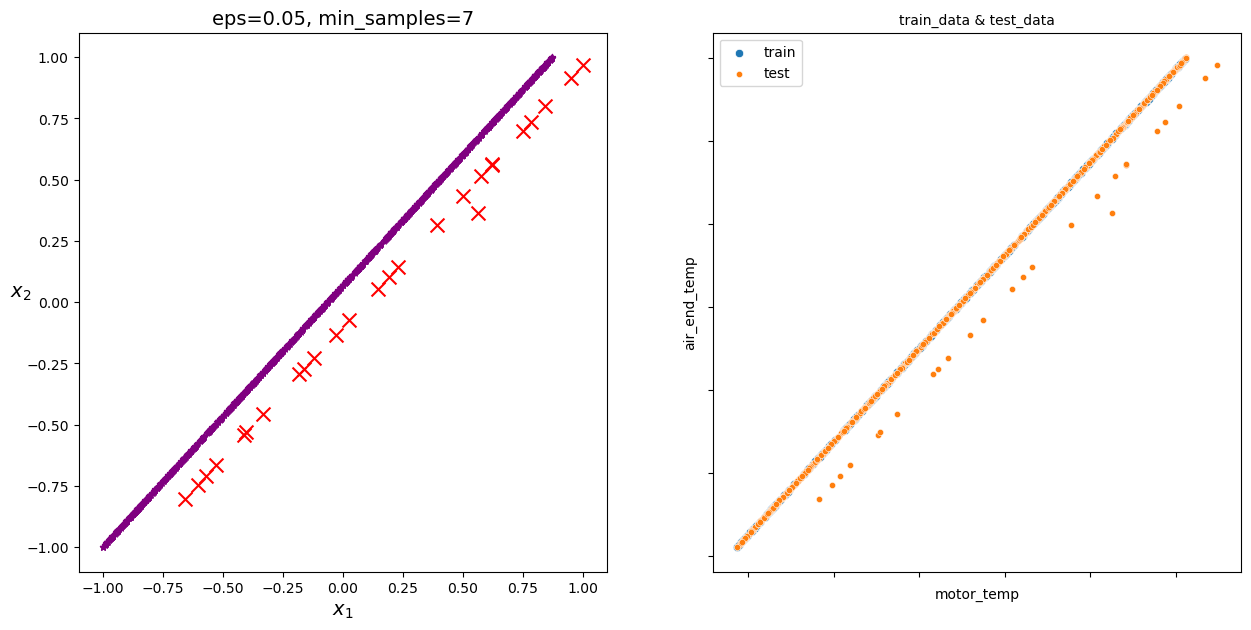

<Figure size 640x480 with 0 Axes>

In [241]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan4, real_data_power_50, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_50, test_data_power_50, 'motor_temp', 'air_end_temp')

plt.tight_layout()

In [242]:
final_data = pd.concat([real_data_power_10[real_data_power_10['data_type'] == 'test'], real_data_power_20[real_data_power_20['data_type'] == 'test'],
           real_data_power_30[real_data_power_30['data_type'] == 'test'], real_data_power_50[real_data_power_50['data_type'] == 'test']])

In [243]:
final_data.sort_values(by='index', inplace=True)
final_data.reset_index(drop=True, inplace=True)

In [244]:
submission2.value_counts('label')

label
0    7054
1     335
dtype: int64

In [245]:
submission3 = submission2.copy()

In [246]:
submission3['label'][final_data[final_data['label'] == 1]['label'].index] = 1
submission3['label']

0       0
1       0
2       0
3       0
4       0
       ..
7384    0
7385    0
7386    0
7387    0
7388    0
Name: label, Length: 7389, dtype: int32

In [247]:
submission3.value_counts('label')

label
0    7054
1     335
dtype: int64

# 모터 전류당 말단 온도

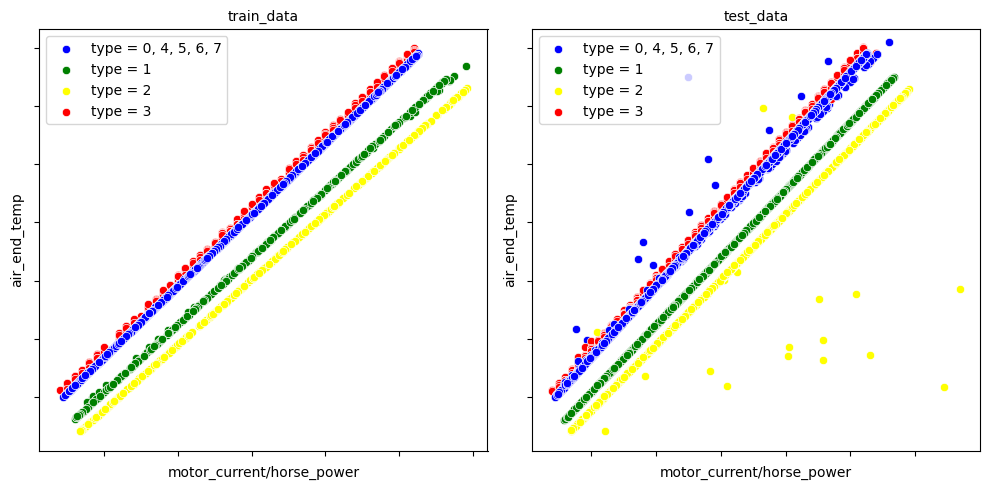

In [96]:
sub_plot_corr(train_data, test_data, 'motor_current/horse_power', 'air_end_temp')

In [248]:
dbscan, z_scaled, labels1 = train_dbscan(sum_data_power_10, 'motor_current/horse_power', 'air_end_temp', eps=0.05)
dbscan2, z_scaled2, labels2 = train_dbscan(sum_data_power_20, 'motor_current/horse_power', 'air_end_temp', eps=0.3)
dbscan3, z_scaled3, labels3 = train_dbscan(sum_data_power_30, 'motor_current/horse_power', 'air_end_temp', eps=0.01)
dbscan4, z_scaled4, labels4 = train_dbscan(sum_data_power_50, 'motor_current/horse_power', 'air_end_temp', eps=0.05)

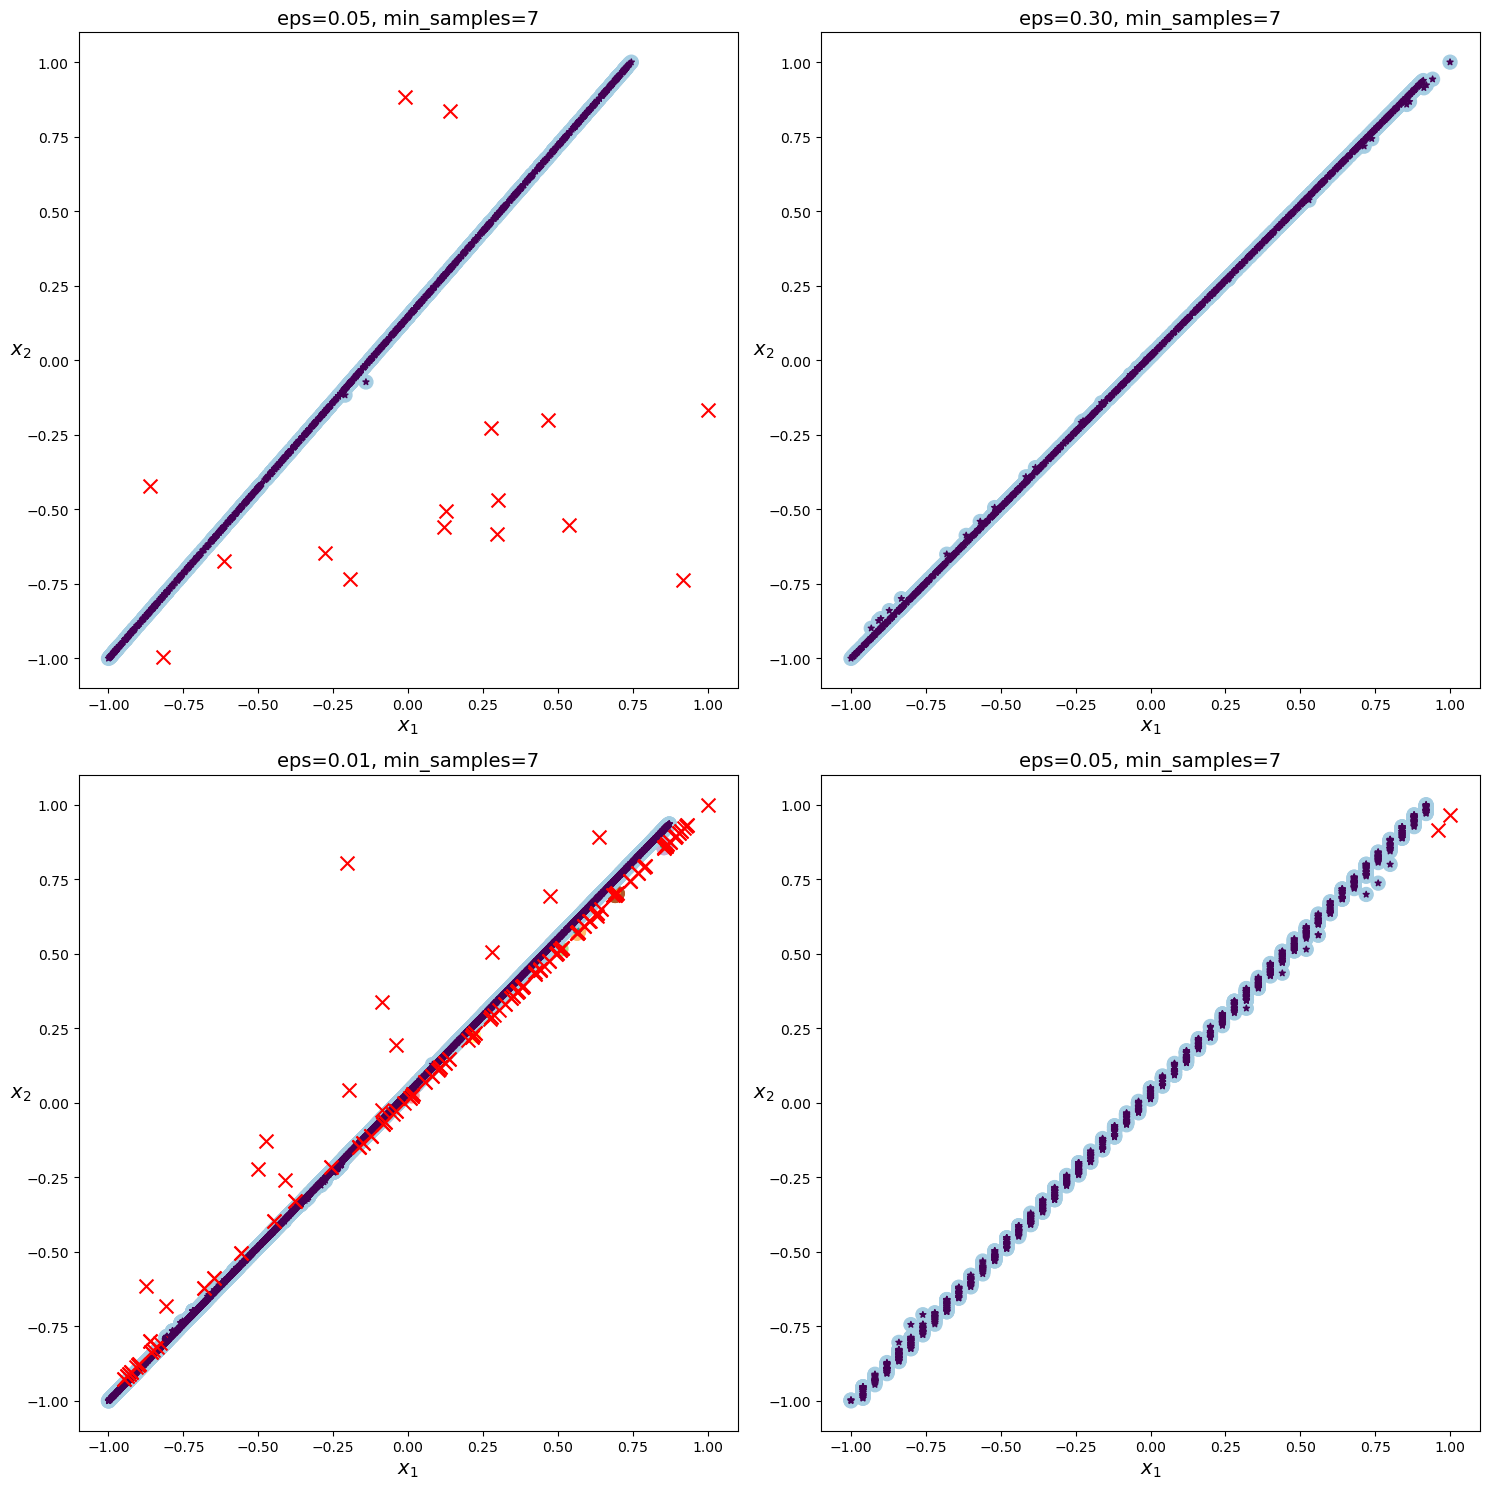

In [249]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plot_dbscan2(dbscan, z_scaled, size=100)

plt.subplot(2,2,2)
plot_dbscan2(dbscan2, z_scaled2, size=100)

plt.subplot(2,2,3)
plot_dbscan2(dbscan3,z_scaled3, size=100)

plt.subplot(2,2,4)
plot_dbscan2(dbscan4, z_scaled4, size=100)

plt.tight_layout()

# rpm당 전류

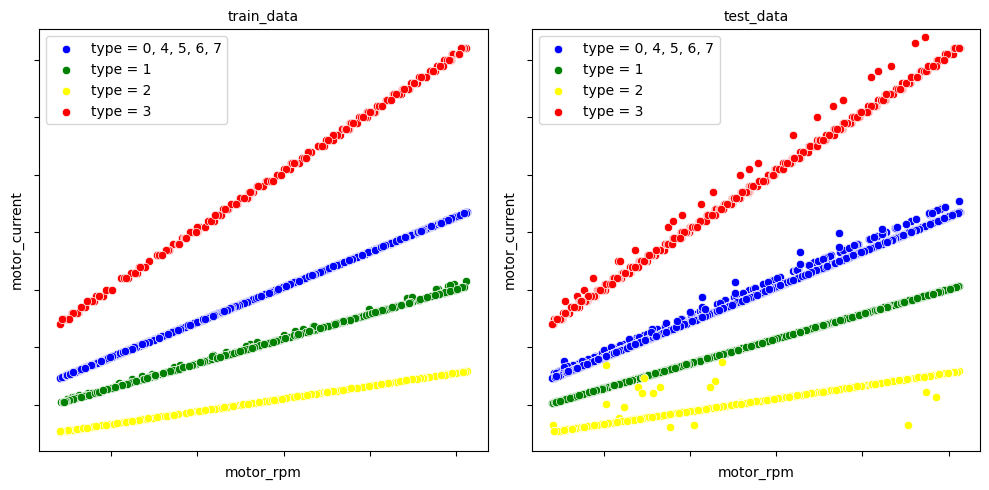

In [390]:
sub_plot_corr(train_data, test_data, 'motor_rpm', 'motor_current')

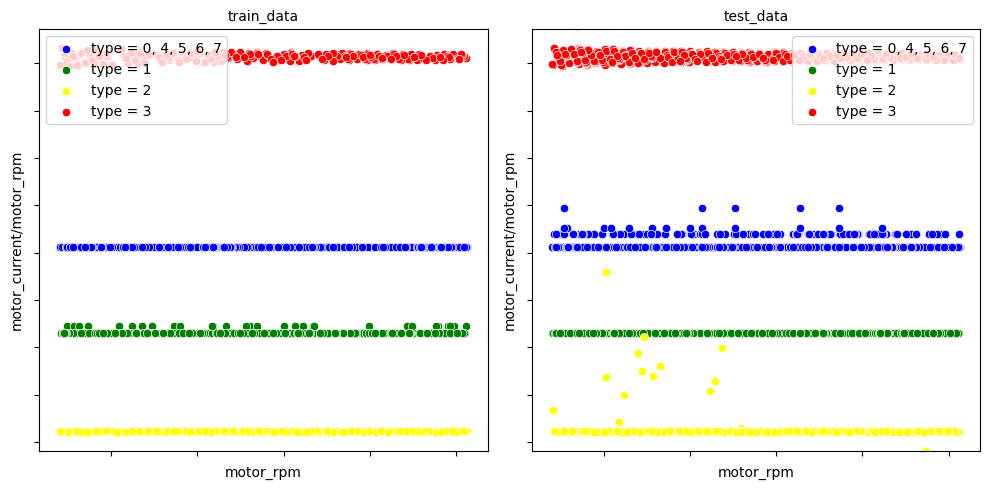

In [250]:
sub_plot_corr(train_data, test_data, 'motor_rpm', 'motor_current/motor_rpm')

In [361]:
dbscan, z_scaled, labels1 = train_dbscan(sum_data_power_10, 'motor_rpm', 'motor_current/motor_rpm', eps=0.02)
dbscan2, z_scaled2, labels2 = train_dbscan(sum_data_power_20, 'motor_rpm', 'motor_current/motor_rpm', eps=0.3)
dbscan3, z_scaled3, labels3 = train_dbscan(sum_data_power_30, 'motor_rpm', 'motor_current/motor_rpm', eps=0.1)
dbscan4, z_scaled4, labels4 = train_dbscan(sum_data_power_50, 'motor_rpm', 'motor_current/motor_rpm', eps=0.1)

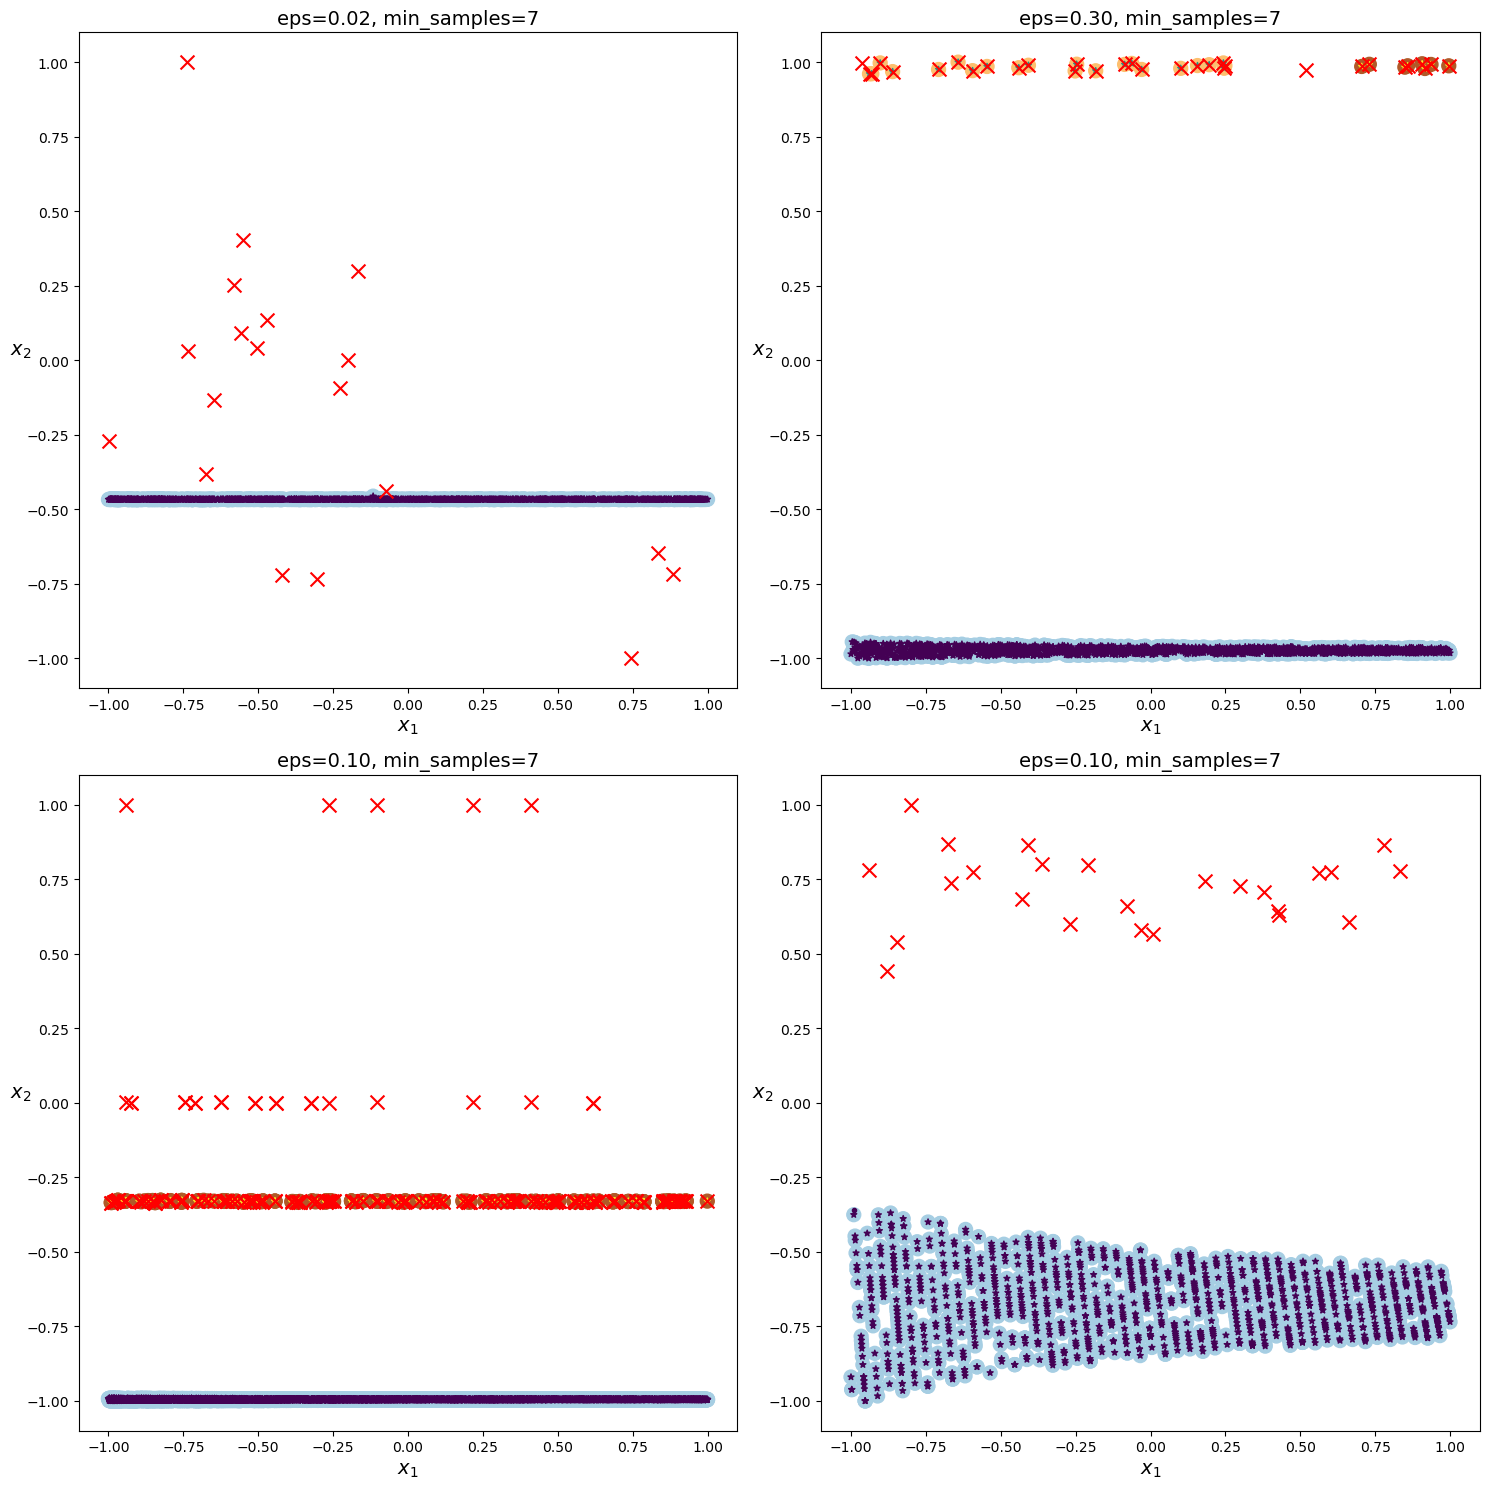

In [362]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plot_dbscan2(dbscan, z_scaled, size=100)

plt.subplot(2,2,2)
plot_dbscan2(dbscan2, z_scaled2, size=100)

plt.subplot(2,2,3)
plot_dbscan2(dbscan3,z_scaled3, size=100)

plt.subplot(2,2,4)
plot_dbscan2(dbscan4, z_scaled4, size=100)

plt.tight_layout()

In [363]:
real_data_power_10 = pd.concat([pd.DataFrame(z_scaled, columns=['x1', 'x2']),pd.DataFrame(labels1, columns=['label']),
                                sum_data_power_10['index'],sum_data_power_10['data_type']], axis=1).reset_index(drop=True)
real_data_power_20 = pd.concat([pd.DataFrame(z_scaled2, columns=['x1', 'x2']),pd.DataFrame(labels2, columns=['label']),
                               sum_data_power_20['index'],sum_data_power_20['data_type']], axis=1).reset_index(drop=True)
real_data_power_30 = pd.concat([pd.DataFrame(z_scaled3, columns=['x1', 'x2']),pd.DataFrame(labels3, columns=['label']),
                               sum_data_power_30['index'],sum_data_power_30['data_type']], axis=1).reset_index(drop=True)
real_data_power_50 = pd.concat([pd.DataFrame(z_scaled4, columns=['x1', 'x2']),pd.DataFrame(labels4, columns=['label']),
                                sum_data_power_50['index'],sum_data_power_50['data_type']], axis=1).reset_index(drop=True)
train_data_power_30 = pd.concat([train_data_0, train_data_4, train_data_5, train_data_6, train_data_7]).reset_index()
train_data_power_20 = train_data_1
train_data_power_10 = train_data_2
train_data_power_50 = train_data_3
test_data_power_30 = pd.concat([test_data_0, test_data_4, test_data_5, test_data_6, test_data_7]).reset_index()
test_data_power_20 = test_data_1
test_data_power_10 = test_data_2
test_data_power_50 = test_data_3

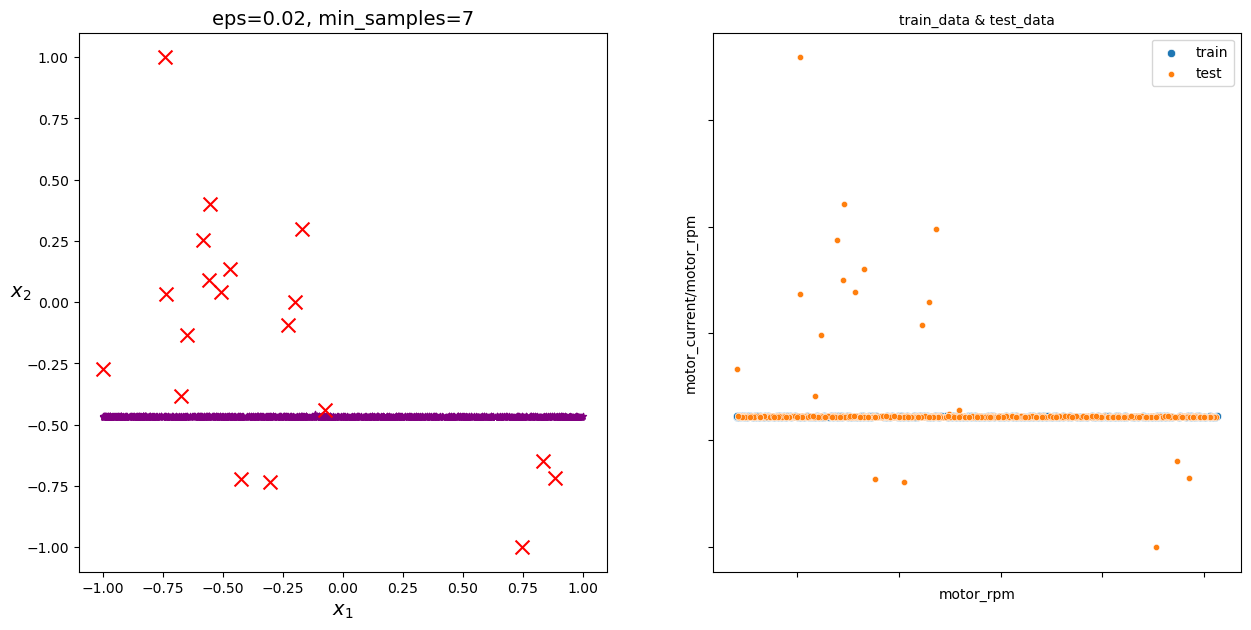

<Figure size 640x480 with 0 Axes>

In [364]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan, real_data_power_10, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_10, test_data_power_10, 'motor_rpm', 'motor_current/motor_rpm')

plt.tight_layout()

In [255]:
# real_data_power_20['label'][real_data_power_20[real_data_power_20['x2'] > 0]['label'].index] = 0

In [374]:
index = [real_data_power_20['label'][real_data_power_20[real_data_power_20['x2'] > 0]['label'].index]]

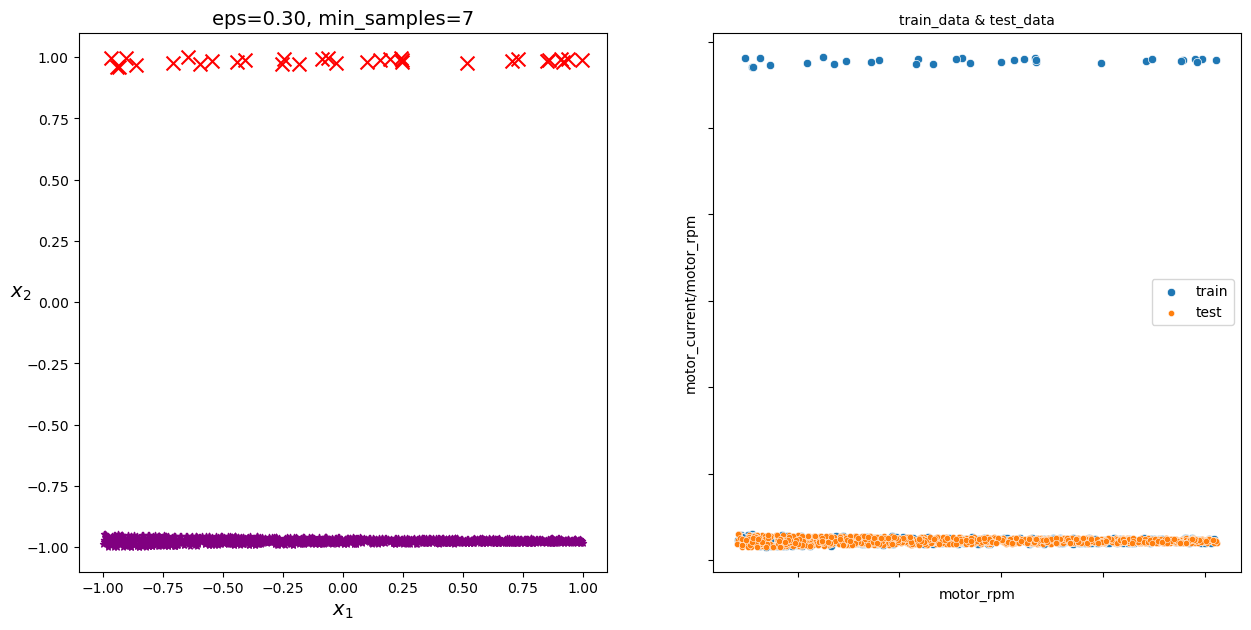

<Figure size 640x480 with 0 Axes>

In [365]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan2, real_data_power_20, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_20, test_data_power_20, 'motor_rpm', 'motor_current/motor_rpm')

plt.tight_layout()

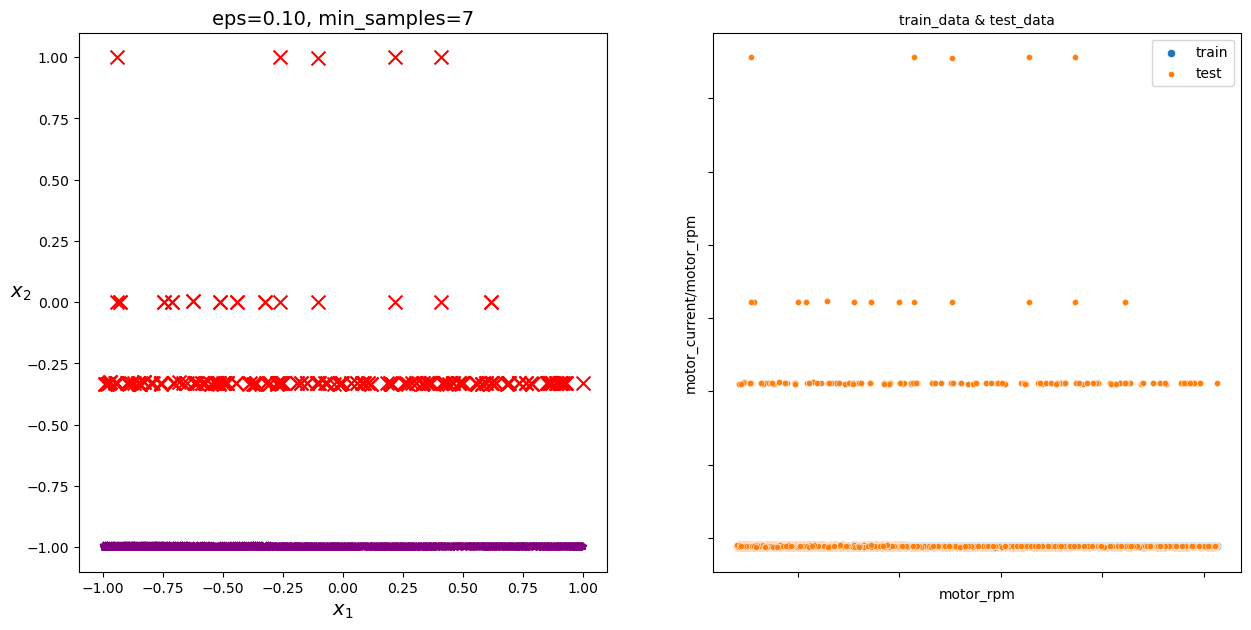

<Figure size 640x480 with 0 Axes>

In [366]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan3, real_data_power_30, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_30, test_data_power_30, 'motor_rpm', 'motor_current/motor_rpm')

plt.tight_layout()

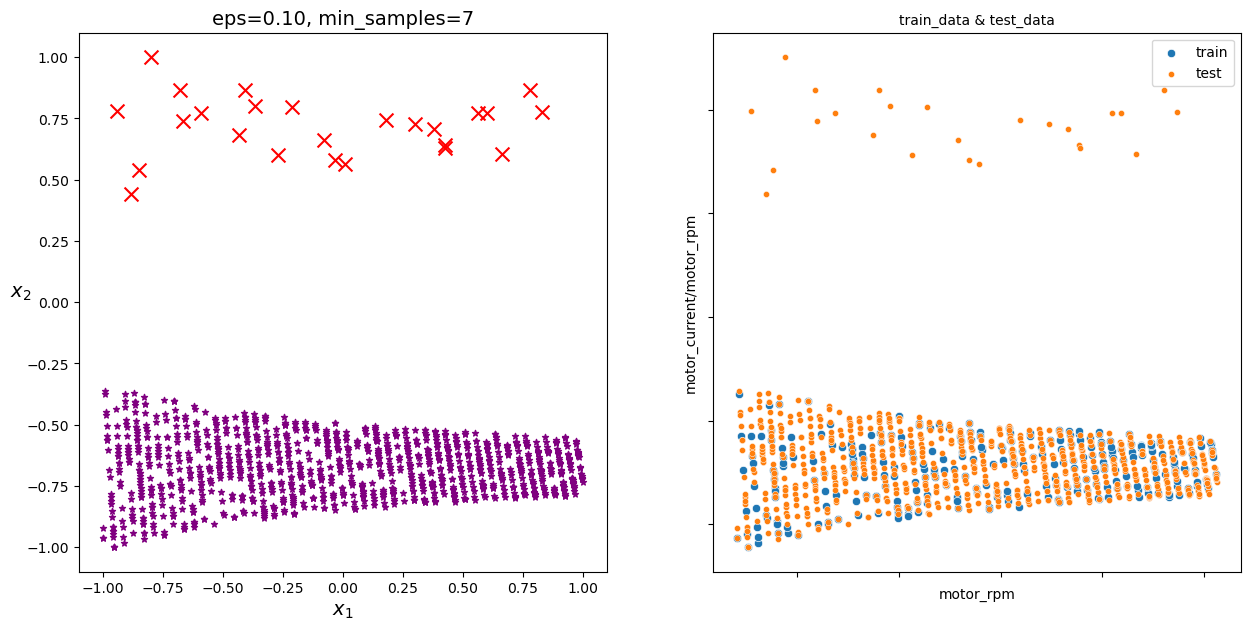

<Figure size 640x480 with 0 Axes>

In [367]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plot_dbscan3(dbscan4, real_data_power_50, size=100)

plt.subplot(1,2,2)
sub_plot_corr2(train_data_power_50, test_data_power_50, 'motor_rpm', 'motor_current/motor_rpm')

plt.tight_layout()

In [368]:
final_data = pd.concat([real_data_power_10[real_data_power_10['data_type'] == 'test'], real_data_power_20[real_data_power_20['data_type'] == 'test'],
           real_data_power_30[real_data_power_30['data_type'] == 'test'], real_data_power_50[real_data_power_50['data_type'] == 'test']])
final_data.sort_values(by='index', inplace=True)
final_data.reset_index(drop=True, inplace=True)

In [261]:
submission3['label'].value_counts()

0    7054
1     335
Name: label, dtype: int64

In [369]:
submission3['label'][real_data_power_20['index'][real_data_power_20[real_data_power_20['x2'] > 0]['label'].index]].unique()

array([0])

In [370]:
submission4 = submission3.copy()

In [371]:
submission4['label'][final_data[final_data['label'] == 1]['label'].index] = 1
submission4['label']

0       0
1       0
2       0
3       0
4       0
       ..
7384    0
7385    0
7386    0
7387    0
7388    0
Name: label, Length: 7389, dtype: int32

In [372]:
submission4.value_counts('label')

label
0    7054
1     335
dtype: int64

In [126]:
submission5 = submission4.copy()

In [380]:
test_data[test_data['out_pressure'] != 0.7]['out_pressure']

4917    0.60
4918    0.60
4919    0.54
4920    0.50
4921    0.50
4922    0.49
4923    0.49
Name: out_pressure, dtype: float64

In [410]:
submission5['label'][test_data[test_data['out_pressure'] != 0.7]['out_pressure'].index] = 1
submission5['label']

0       0
1       0
2       0
3       0
4       0
       ..
7384    0
7385    0
7386    0
7387    0
7388    0
Name: label, Length: 7389, dtype: int32

In [411]:
submission5.value_counts('label')

label
0    7047
1     342
dtype: int64

In [383]:
submission5.to_csv('submission5.csv', index=True)

# rpm당 온도

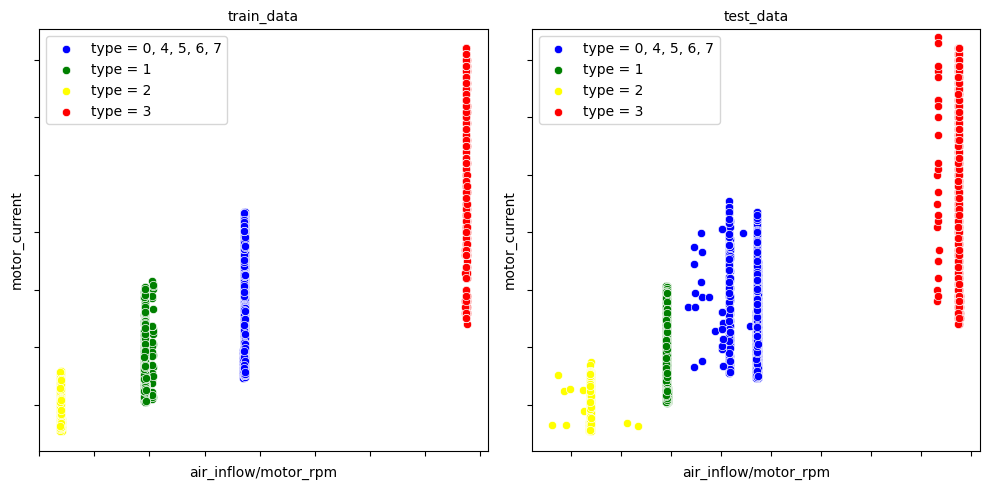

In [429]:
sub_plot_corr(train_data, test_data, 'air_inflow/motor_rpm', 'motor_current')